<a href="https://colab.research.google.com/github/CrAvila/IA/blob/main/PF/Inteligencia_Artificial_Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div>
<img src="https://drive.google.com/uc?export=download&id=1lhTXu7FShFdtXWptJH3ZOPyxOdFY8kOf" width="500"/>
</div>


## Pontificia Universidad Javeriana

#### Departamento de Ingeniería Electrónica

#### Inteligencia Artificial

## Proyecto Final

Alumnos:

**Salvador Marcelo Mejía Hernández**

**Carlos Roberto Ávila Hernández**

Profesor:

**Alexander Caicedo Dorado**

# Problema: Bank Marketing

## Descripción

Se tomará la Base de Datos "Bank Marketing" del UCI Repository. Este conjunto de datos está relacionado directamente con campañas de marketing de una institución bancaria Portuguesa. Las campañas de marketing fueron basadas en llamadas telefónicas. A menido, más de un contacto al mismo cliente era requerido, para determinar si el producto (deposito bancario a plazo) estaría ("si") o no ("no") suscrito.

El objetivo es clasificar si el cliente se suscribirá (sí/no) al producto de depósito a plazos (variable de salida $y$).

## Variables

| Nombre de Variable | Rol        | Tipo         | Demográfico       | Descripción | Unidades | Valores Faltantes |
|--------------------|------------|--------------|-------------------|-------------|----------|-------------------|
| age                | Característica | Entero      | Edad              |             |          | no                |
| job                | Característica | Categórico  | Ocupación         | Tipo de trabajo (categórico: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', etc.) | | no |
| marital            | Característica | Categórico  | Estado Civil      | Estado civil (categórico: 'divorced', 'married', 'single', 'unknown'; nota: 'divorced' significa divorciado o viudo) | | no |
| education          | Característica | Categórico  | Nivel Educativo   | (categórico: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') | | no |
| default            | Característica | Binario     |                   | ¿Tiene crédito en mora? | | no |
| balance            | Característica | Entero      |                   | Saldo promedio anual | euros | no |
| housing            | Característica | Binario     |                   | ¿Tiene préstamo hipotecario? | | no |
| loan               | Característica | Binario     |                   | ¿Tiene préstamo personal? | | no |
| contact            | Característica | Categórico  |                   | Tipo de comunicación de contacto (categórico: 'cellular', 'telephone') | | sí |
| day_of_week        | Característica | Fecha       |                   | Último día de contacto de la semana | | no |

### Información Adicional de las Variables

**Variables de entrada:**
- **Datos del cliente bancario:**
  1. **age**: (numérico)
  2. **job**: tipo de trabajo (categórico: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
  3. **marital**: estado civil (categórico: "married", "divorced", "single"; nota: "divorced" significa divorciado o viudo)
  4. **education**: (categórico: "unknown", "secondary", "primary", "tertiary")
  5. **default**: ¿tiene crédito en mora? (binario: "yes", "no")
  6. **balance**: saldo promedio anual, en euros (numérico)
  7. **housing**: ¿tiene préstamo hipotecario? (binario: "yes", "no")
  8. **loan**: ¿tiene préstamo personal? (binario: "yes", "no")
- **Relacionado con el último contacto de la campaña actual:**
  9. **contact**: tipo de comunicación de contacto (categórico: "unknown", "telephone", "cellular")
  10. **day**: último día de contacto del mes (numérico)
  11. **month**: último mes de contacto del año (categórico: "jan", "feb", "mar", ..., "nov", "dec")
  12. **duration**: duración del último contacto, en segundos (numérico)
- **Otras características:**
  13. **campaign**: número de contactos realizados durante esta campaña para este cliente (numérico, incluye último contacto)
  14. **pdays**: número de días que han pasado desde que el cliente fue contactado por última vez desde una campaña anterior (numérico, -1 significa que el cliente no fue contactado previamente)
  15. **previous**: número de contactos realizados antes de esta campaña para este cliente (numérico)
  16. **poutcome**: resultado de la campaña de marketing anterior (categórico: "unknown", "other", "failure", "success")

**Variable de salida (objetivo deseado):**
17.  **y**: ¿ha suscrito el cliente un depósito a plazo? (binario: "yes", "no")


Comenzaremos importando los datos desde el UCI Repository:

# Análisis de los Datos

In [ ]:
!pip install ucimlrepo
!pip install pandas
!pip install scikit-learn-extra
!pip install dython
!pip install torch

In [364]:
from ucimlrepo import fetch_ucirepo
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets
data = pd.concat([X, y], axis=1)

Podemos visualizar de manera general como se ven los datos con su respectiva salida:

In [ ]:
display(data.head(10).style.hide(axis="index"))

age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,nan,5,may,261,1,-1,0,nan,no
44,technician,single,secondary,no,29,yes,no,nan,5,may,151,1,-1,0,nan,no
33,entrepreneur,married,secondary,no,2,yes,yes,nan,5,may,76,1,-1,0,nan,no
47,blue-collar,married,nan,no,1506,yes,no,nan,5,may,92,1,-1,0,nan,no
33,nan,single,nan,no,1,no,no,nan,5,may,198,1,-1,0,nan,no
35,management,married,tertiary,no,231,yes,no,nan,5,may,139,1,-1,0,nan,no
28,management,single,tertiary,no,447,yes,yes,nan,5,may,217,1,-1,0,nan,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,nan,5,may,380,1,-1,0,nan,no
58,retired,married,primary,no,121,yes,no,nan,5,may,50,1,-1,0,nan,no
43,technician,single,secondary,no,593,yes,no,nan,5,may,55,1,-1,0,nan,no


También verificamos que no tengamos datos duplicados:

In [ ]:
# Número original de datos
original_rows = len(data)
print(f"Original number of rows: {original_rows}")

# Eliminando duplicados
data_unique = data.drop_duplicates()

# Número de datos originales
unique_rows = len(data_unique)
print(f"Number of unique rows: {unique_rows}")

# Número de datos removidos
duplicate_rows = original_rows - unique_rows
print(f"Number of duplicate rows removed: {duplicate_rows}")

Original number of rows: 45211
Number of unique rows: 45211
Number of duplicate rows removed: 0


No hay duplicados, así que usaremos los datos originales.

In [ ]:
display(X.head(10).style.hide(axis="index"))

age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
58,management,married,tertiary,no,2143,yes,no,nan,5,may,261,1,-1,0,nan
44,technician,single,secondary,no,29,yes,no,nan,5,may,151,1,-1,0,nan
33,entrepreneur,married,secondary,no,2,yes,yes,nan,5,may,76,1,-1,0,nan
47,blue-collar,married,nan,no,1506,yes,no,nan,5,may,92,1,-1,0,nan
33,nan,single,nan,no,1,no,no,nan,5,may,198,1,-1,0,nan
35,management,married,tertiary,no,231,yes,no,nan,5,may,139,1,-1,0,nan
28,management,single,tertiary,no,447,yes,yes,nan,5,may,217,1,-1,0,nan
42,entrepreneur,divorced,tertiary,yes,2,yes,no,nan,5,may,380,1,-1,0,nan
58,retired,married,primary,no,121,yes,no,nan,5,may,50,1,-1,0,nan
43,technician,single,secondary,no,593,yes,no,nan,5,may,55,1,-1,0,nan


Procedemos a realizar la partición inicial de los datos:

In [ ]:
from sklearn.model_selection import train_test_split

# Se hace la partición conservando distribución por clase original
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Create the complete training data table by concatenating the features and the target variable
data_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
display(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 13382 to 3184
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          31647 non-null  int64 
 1   job          31441 non-null  object
 2   marital      31647 non-null  object
 3   education    30333 non-null  object
 4   default      31647 non-null  object
 5   balance      31647 non-null  int64 
 6   housing      31647 non-null  object
 7   loan         31647 non-null  object
 8   contact      22547 non-null  object
 9   day_of_week  31647 non-null  int64 
 10  month        31647 non-null  object
 11  duration     31647 non-null  int64 
 12  campaign     31647 non-null  int64 
 13  pdays        31647 non-null  int64 
 14  previous     31647 non-null  int64 
 15  poutcome     5730 non-null   object
dtypes: int64(7), object(9)
memory usage: 4.1+ MB


None

Y analizaremos los datos con la partición de entrenamiento para no tener un sesgo a la hora de seleccionar las variables o analizar los datos:

In [ ]:
# Calculate summary statistics using describe()
desc_stats = data_train.describe()

# Define a formatting function
def format_describe_cell(val):
    if val.is_integer():
        return f'{val:.0f}'
    else:
        return f'{val:.2f}'

# Apply the formatting function to the describe() result
formatted_desc_stats = desc_stats.applymap(format_describe_cell)

# Display the formatted descriptive statistics
display(formatted_desc_stats)

,age,balance,day_of_week,duration,campaign,pdays,previous
count,31647,31647,31647,31647,31647,31647,31647
mean,40.88,1363.59,15.81,258.76,2.76,39.87,0.58
std,10.62,3070.24,8.33,259.88,3.10,99.67,2.49
min,18,-8019,1,0,1,-1,0
25%,33,74,8,103,1,-1,0
50%,39,451,16,180,2,-1,0
75%,48,1427.50,21,318,3,-1,0
max,95,102127,31,4918,63,871,275


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numerical_distribution(data, numerical_column, output_column, figsize=(10, 8), nb=None):
    sns.set_palette("bright")
    sns.set_style("darkgrid")

    # Calcular el número óptimo de bins según la regla de Sturges
    num_bins = nb if nb else int(1 + np.log2(len(data)))

    # Histograma de la distribución de la variable numérica
    fig, ax = plt.subplots(figsize=figsize)
    sns.histplot(data[numerical_column], kde=True, bins=num_bins, ax=ax)
    ax.set_title(f'{numerical_column} Distribution')
    ax.set_xlabel(numerical_column.capitalize())
    ax.set_ylabel('Frequency')
    plt.show()

    # Relación entre la variable numérica y la variable de salida
    fig, ax = plt.subplots(figsize=figsize)
    sns.histplot(data=data, x=numerical_column, hue=output_column, kde=True, bins=num_bins,
                 stat='density', multiple='fill', palette=["lightcoral", "skyblue"])
    ax.set_title(f'Relation between {numerical_column} and {output_column}')
    ax.set_xlabel(numerical_column.capitalize())
    ax.set_ylabel('Density')
    plt.show()

In [ ]:
def plot_categorical_distribution(data, categorical_column, output_column, s=(8,4)):

    sns.set_palette("pastel")
    sns.set_style("darkgrid")

    # Gráfico de barras para la distribución de la columna categórica
    plt.figure(figsize=s)
    # Calcula las frecuencias relativas
    category_freq = data[categorical_column].value_counts(normalize=True)
    sns.barplot(x=category_freq.index, y=category_freq.values)
    plt.xticks(rotation=45)
    plt.title(f'{categorical_column} Distribution')
    plt.ylabel('Relative Frequency')
    plt.show()

    # Gráfico de barras para la relación con la variable de salida
    plt.figure(figsize=s)
    # Calcula las frecuencias relativas por categoría y por clase de salida
    category_output_freq = data.groupby(categorical_column)[output_column].value_counts(normalize=True).rename('frequency').reset_index()
    sns.barplot(x=categorical_column, y='frequency', hue=output_column, data=category_output_freq, palette=["lightcoral", "skyblue"])
    plt.xticks(rotation=45)
    plt.title(f'Relation between {categorical_column} and {output_column}')
    plt.ylabel('Relative Frequency')
    plt.show()

## Datos del Cliente Bancario:

### Análisis de Distribución Etaria

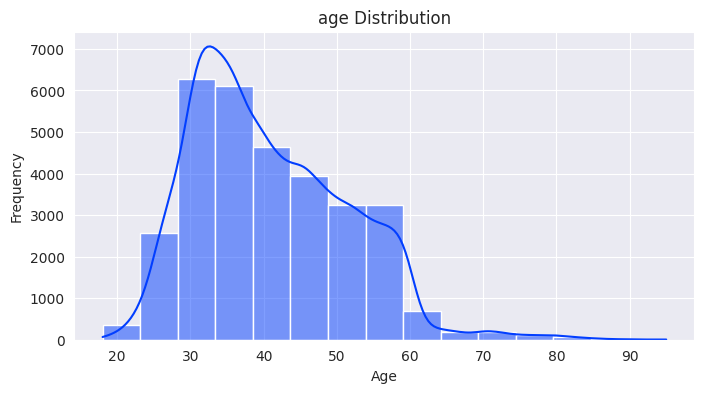

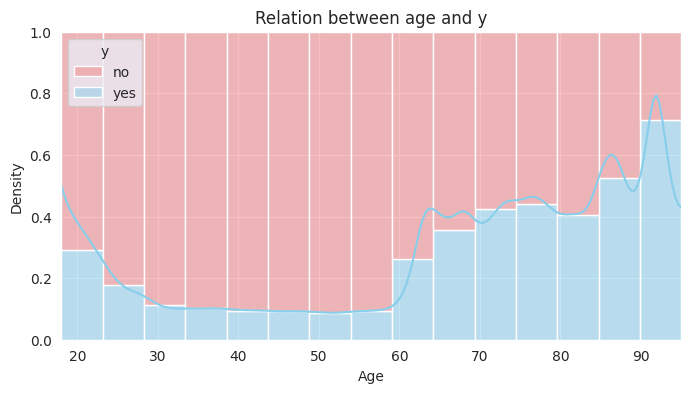

In [ ]:
# Uso de la función con el conjunto de datos y columnas específicas
plot_numerical_distribution(data_train, 'age', 'y', figsize=(8,4))


El histograma muestra la frecuencia de las edades y proporciona insights importantes:
- **Unimodal y Sesgada**: La distribución es unimodal con un pico entre los 30 y 40 años y muestra un sesgo positivo.
- **Menor Frecuencia en Edades Avanzadas**: Aunque la presencia de individuos disminuye con la edad, se extiende hasta los 90 años.
- **Aproximadamente Normal**: La forma de la curva de densidad del kernel sugiere una distribución de edad aproximadamente normal.

El histograma de densidad revela cómo la edad se relaciona con la variable binaria `y`:

- **Suscripciones en Extremos de Edad**: Mayores tasas de suscripción (`yes`) en jóvenes y mayores, con puntos altos en menores de 30 y más de 60 años.
- **Menores Tasas en Edades Medias**: Entre los 30 y 60 años, las tasas de suscripción (`no`) son más altas.

Podemos concluir:

- **Segmentación por Edad**: Es evidente que las preferencias o la disposición a suscribirse varían significativamente con la edad.
- **Tendencias de Suscripción**: Las personas en las etapas inicial y final de la vida laboral muestran una mayor tendencia a suscribirse, lo que podría reflejar distintas motivaciones o necesidades financieras.

Este análisis proporciona una base para estrategias dirigidas y decisiones de modelado en función de la edad de los clientes.


### Análisis de Distribución de Trabajos

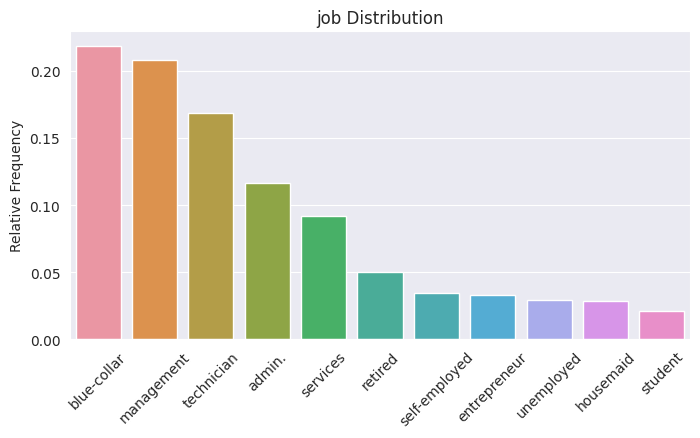

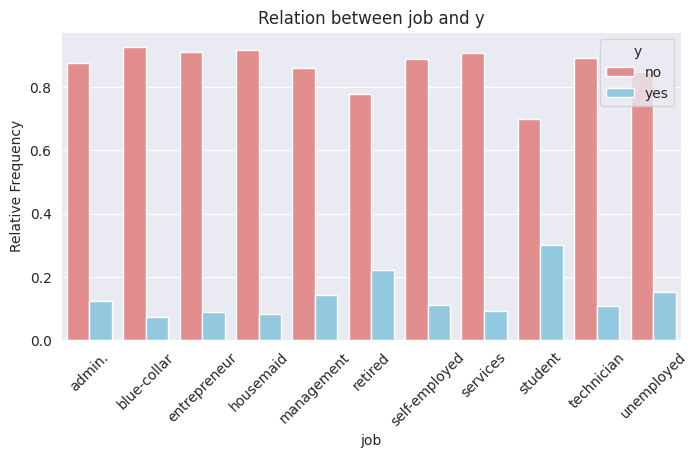

In [ ]:
plot_categorical_distribution(data_train, 'job', 'y')

La primera gráfica muestra la distribución de las diferentes categorías de trabajos entre los clientes. Esto establece una comprensión de base sobre cómo se distribuyen las ocupaciones en la muestra, lo cual es fundamental para comprender la representatividad de los datos. Si algunas categorías tienen muy pocos representantes, las predicciones para esas categorías podrían ser menos confiables debido a la falta de datos.

La segunda gráfica muestra la relación entre las categorías de trabajo y la variable de salida "y", que indica si los clientes se suscribieron o no al producto de depósito a plazo.

A partir de estas gráficas, podemos observar lo siguiente:

**Diferentes tasas de suscripción entre categorías de trabajo:** Algunas categorías de trabajo, como "student" y "retired", muestran una proporción más alta de suscripciones que otras categorías. Esto podría implicar que las características demográficas y socioeconómicas asociadas con estas categorías podrían estar influyendo en la decisión de suscribirse al producto.

**Dominancia de la categoría 'no':** En todas las categorías de trabajo, hay una tendencia significativa hacia la no suscripción. Esto sugiere que el modelo debe ser particularmente bueno para discriminar en este desequilibrio de clases para evitar sesgos en las predicciones.

**Datos desbalanceados:** Si la cantidad de datos para las categorías 'sí' y 'no' es muy desigual, puede ser necesario aplicar técnicas de balanceo de clases, como sobremuestreo, submuestreo, o ponderación de clases en la función de pérdida durante el entrenamiento de la red neuronal.

**Potencial de la característica 'job' como predictora:** La variación en las tasas de suscripción entre diferentes trabajos sugiere que 'job' puede ser una característica predictiva significativa para el modelo. Sin embargo, el peso real y la significación estadística de esta variable solo se pueden confirmar mediante un análisis más riguroso, como la evaluación de la importancia de la característica dentro del modelo de redes neuronales.

### Análisis de Distribución Marital

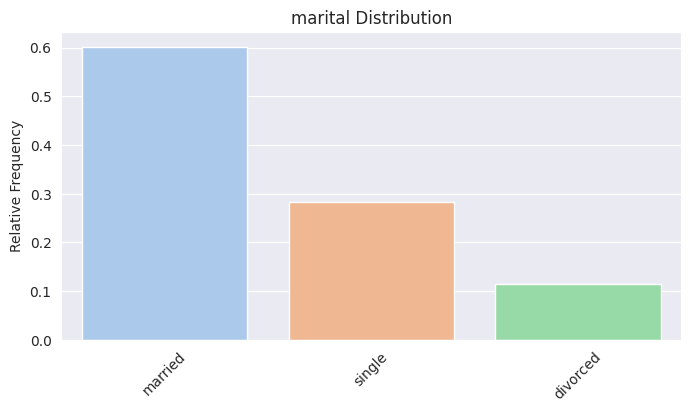

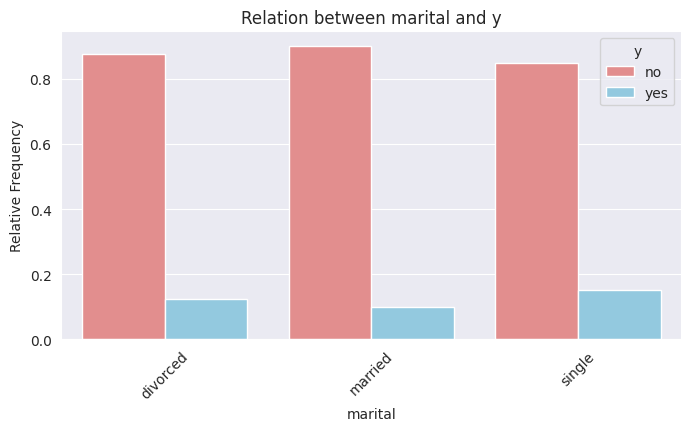

In [ ]:
plot_categorical_distribution(data_train, 'marital', 'y')

Las gráficas proporcionan una visión profunda de la distribución del estado civil en la muestra estudiada y su relación con la suscripción a productos de depósito a plazo. La primera gráfica, que ilustra la distribución marital, muestra una predominancia de individuos casados, seguida por personas solteras y una menor representación de divorciados. Esta distribución es un reflejo de la población de clientes en la institución bancaria y es vital para comprender los patrones subyacentes de comportamiento financiero asociados con el estado civil.

La segunda gráfica nos lleva más allá al correlacionar el estado civil con la suscripción al producto de depósito a plazo, indicado por la variable `y`. Se observa una tendencia clara donde la proporción de no suscripción supera la de suscripción en todas las categorías maritales. Aunque existen variaciones entre los diferentes estados civiles, ninguna categoría muestra una inclinación hacia una tasa de suscripción excepcionalmente alta, lo que indica que el estado civil, aunque relevante, podría no ser un determinante fuerte de la suscripción en comparación con otras variables posibles. Alo mucho podemos observar que estadísticamente, es menos probable que alguien casado se suscriba al producto.

Con esto, observamos lo siguiente:

**El estado civil como predictor**: La influencia del estado civil en la decisión de suscribirse a un depósito a plazo parece ser moderada, lo que sugiere que debe ser considerado junto con otras variables en el modelo.

**Manejo de clases desbalanceadas**: La tendencia hacia una mayor no suscripción resalta la necesidad de estrategias para abordar el desbalance de clases en el modelado predictivo.

**Evaluación de la significancia estadística**: Es esencial realizar un análisis estadístico, como el test Chi-Cuadrado, para evaluar la significancia de la relación entre el estado civil y la suscripción a depósitos a plazo.

**Importancia del análisis multivariante**: Un análisis que considere múltiples variables simultáneamente será crucial para comprender la interacción entre el estado civil y otras características en la predicción de la suscripción.


### Análisis de Distribución de Educación

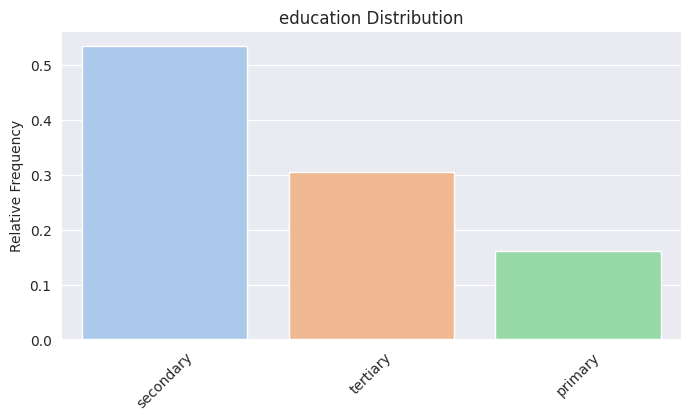

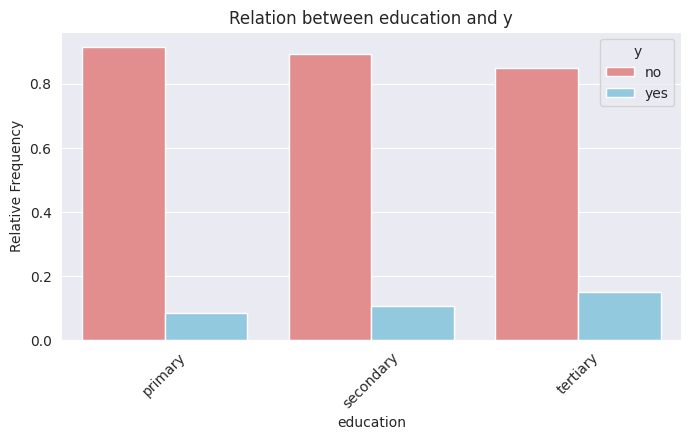

In [ ]:
plot_categorical_distribution(data_train, 'education', 'y')

Nivel Educativo (education)
La distribución de la variable "education" muestra la proporción de clientes según su nivel educativo. La relación con la variable de salida "y" indica si esta característica podría ser un predictor relevante.

**Distribución del Nivel Educativo:**

El primer gráfico muestra la frecuencia relativa de los niveles educativos entre los contactados:
- **Mayoría con Educación Secundaria**: La mayoría de los contactados tienen un nivel de educación secundaria.
- **Menor Proporción con Educación Primaria**: La educación primaria es la menos representada entre los contactados.

**Relación entre Nivel Educativo y Respuesta 'y':**

El segundo gráfico muestra la relación entre el nivel educativo y la respuesta `y`:
- **Tasa de Respuesta Positiva**: Aunque los individuos con educación secundaria son los más frecuentes, la tasa de respuesta positiva (`yes`) es relativamente similar entre los tres niveles educativos.
- **Educación y Tasa de Éxito**: No hay una diferencia marcada en la tasa de éxito entre los distintos niveles educativos, lo que sugiere que otros factores podrían tener un papel más determinante en la decisión del cliente.

**Implicaciones y Estrategias:**

- **Inclusión Educativa en la Segmentación de Clientes**: La falta de una correlación fuerte entre el nivel educativo y la tasa de respuesta puede indicar que la educación no debería ser el único factor para segmentar el mercado en futuras campañas.
- **Análisis Multifactorial**: Sería beneficioso analizar cómo la educación interactúa con otros factores, como el tipo de trabajo o la edad, para entender mejor su impacto en la respuesta a la campaña.
- **Enfoque Personalizado**: Estos hallazgos podrían sugerir la necesidad de un enfoque más personalizado que considere un conjunto más amplio de características del cliente más allá de su educación.

Estos análisis pueden ser útiles para ajustar las estrategias de segmentación del mercado y mejorar la personalización y eficacia de las campañas de marketing.


### Análisis de Distribución de Mora

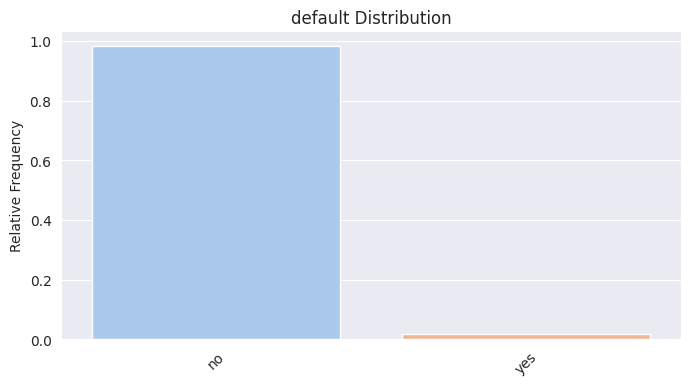

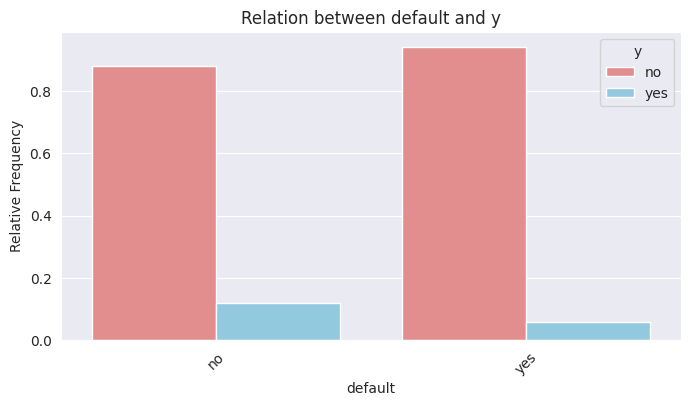

In [ ]:
plot_categorical_distribution(data_train, 'default', 'y')

Los gráficos representan la distribución de la variable default (crédito en mora) y su relación con la variable objetivo y (suscripción a un depósito a plazo).

El primer gráfico muestra que una abrumadora mayoría de los clientes no tienen créditos en mora (no), mientras que solo una fracción muy pequeña sí los tiene (yes). Esta distribución extremadamente desbalanceada indica que la característica default es muy sesgada hacia una de las categorías.

El segundo gráfico compara las frecuencias relativas de suscripción sí y no para cada valor de la variable default. Para los clientes sin crédito en mora (no), la proporción de no suscripción al producto de depósito a plazo es significativamente más alta que la de suscripción. Sin embargo, esta tendencia parece ser aún más pronunciada para los clientes con crédito en mora (yes), aunque hay que tener en cuenta que el número de clientes en esta categoría es mucho menor.

Podemos notar que:

**Potencial de Predictibilidad Baja:** Dado el desequilibrio extremo en la variable default, es probable que no proporcione mucha discriminación predictiva. La mayoría de los modelos tendrán dificultades para aprender patrones significativos de la minoría yes debido a su baja representación.Sin embargo, si que parece ser evidente que las personas sin crédito en mora son más susceptibles a adquirir el producto, por lo que podría ser una potencial variable fuerte que nos podría ayudar a la hora de predecir.

Análisis de Distribución de Crédito en Mora ('default')
La gráfica proporciona una visión detallada de la distribución de la variable 'default' (¿tiene crédito en mora?) en la muestra estudiada y su relación con la suscripción a productos de depósito a plazo. La primera gráfica, que ilustra la distribución de crédito en mora, muestra la predominancia de clientes que no tienen crédito en mora en comparación con aquellos que lo tienen. Esta distribución es esencial para comprender la prevalencia de situaciones de crédito en mora en la población de clientes del banco.

La segunda gráfica nos lleva más allá al correlacionar la presencia de crédito en mora con la suscripción al producto de depósito a plazo, indicado por la variable 'y'. Se observa claramente que la proporción de no suscripción es mucho mayor para aquellos con crédito en mora en comparación con aquellos sin crédito en mora. Esto sugiere que la presencia de crédito en mora podría ser un predictor significativo de la no suscripción al producto de depósito a plazo.

### Análisis de la Distribución de Saldo

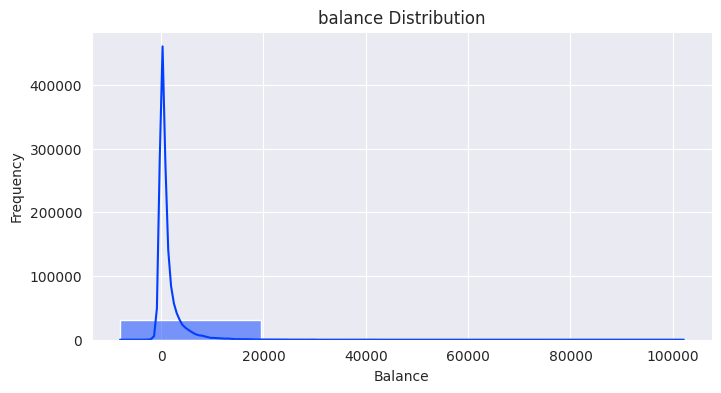

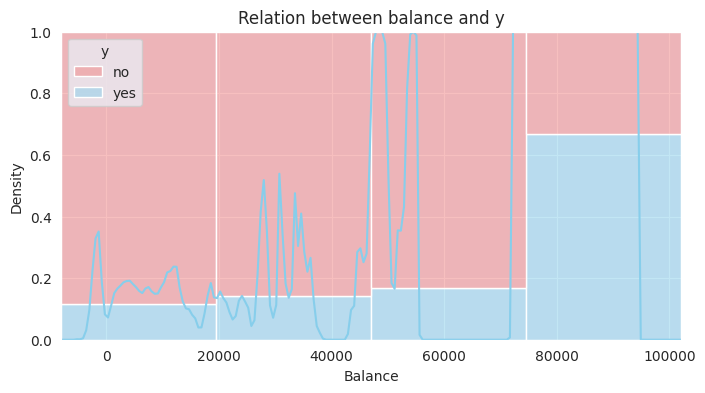

In [ ]:
# Uso de la función con el conjunto de datos y columnas específicas
plot_numerical_distribution(data_train, 'balance', 'y', figsize=(8,4), nb=4)

Con las técnicas de estadística convencionales para complicado distribuir la información en las clases que mejor la represente, por lo que usaremos una técnica de clustering para agrupar estos datos. Intuitivamente, podemos observer que hay ciertos "picos" en la relación de balances, los cuales podríamos usar para determinar el número de clusters a hacer. Aproxiadmente, podríamos intentar con 15 grupos, que luego haremos categorías para asignar a los datos.



El histograma de `balance` muestra:

- **Concentración cerca de cero**: Una gran concentración de saldos cerca del valor cero.
- **Asimetría con cola larga a la derecha**: Indicativo de unos pocos individuos con saldos muy altos.
- **Pico cerca de cero**: Sugiere la presencia de numerosas cuentas con saldos bajos o nulos.

El histograma de densidad relativa a `y` revela:

- **Mayor densidad de `no` en saldos bajos**: Indica que los individuos con saldos más bajos tienden a tener un valor `no` para `y`.
- **Ligera preferencia de `yes` en saldos altos**: Aunque los datos son escasos, parece haber una mayor proporción de `yes` a medida que aumenta el saldo.
- **Variabilidad según el saldo**: La proporción de `yes` a `no` cambia con el nivel de saldo, aunque con datos limitados en los extremos superiores.

Podemos sacar las siguientes conclusiones:

- **Enfoque en Saldos Bajos**: Estrategias dirigidas a individuos con saldos menores podrían ser más relevantes debido a su prevalencia.
- **Posible Correlación con `y`**: Un saldo más alto puede correlacionarse levemente con un resultado positivo en `y`.
- **Tratamiento de Outliers**: Los valores extremadamente altos podrían requerir tratamiento especial para evitar sesgos.
- **Necesidad de Transformación de Datos**: La asimetría de los datos podría beneficiarse de transformaciones para normalizar la distribución.

### Análisis de Distribución de Hipoteca

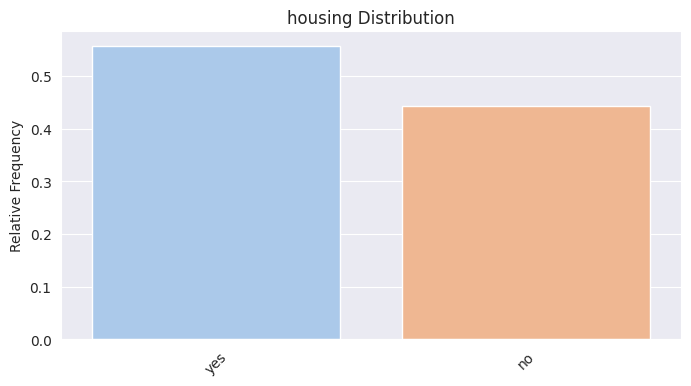

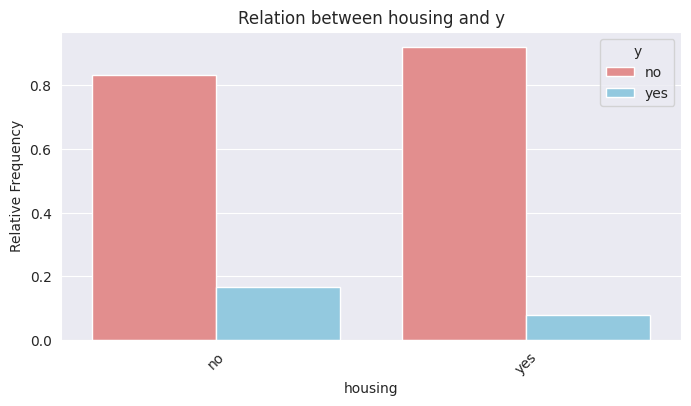

In [ ]:
plot_categorical_distribution(data_train, 'housing', 'y')

El primer gráfico representa la frecuencia relativa de clientes con y sin préstamos de vivienda. Se observa que la distribución está bastante equilibrada, con una ligera prevalencia de clientes que tienen préstamos de vivienda (yes) sobre aquellos que no (no).

El segundo gráfico expone la relación entre la tenencia de préstamos de vivienda y la suscripción al depósito a plazo. Interesantemente, se nota que la proporción de clientes que no se suscriben (no) es mayor en ambos grupos (con y sin préstamo de vivienda) en comparación con aquellos que sí se suscriben (yes). Sin embargo, parece haber una diferencia más notable en la proporción de suscriptores entre los que no tienen préstamo de vivienda en comparación con los que sí lo tienen.

Este caso es muy interesante, y podemos notar que:

**Equilibrio de Clases:** A diferencia de la variable default, housing muestra un equilibrio más cercano entre sus categorías, lo que podría proporcionar una base más sólida para el aprendizaje.

**Influencia en la Decisión:** Existe una tendencia de que los clientes sin préstamos de vivienda se suscriben más al producto de depósito a plazo que aquellos con préstamos. Esto sugiere que la carga financiera de un préstamo de vivienda podría influir en la capacidad o voluntad de invertir en un depósito a plazo.

**Importancia para la Modelización:** La presencia de un préstamo de vivienda parece tener algún impacto en la decisión de suscripción, lo que la convierte en una variable potencialmente útil para incluir en el modelo predictivo.

**Selección de Características:** Será importante realizar análisis estadísticos adicionales para determinar la fuerza y significancia de la relación entre housing y y, lo que puede hacerse a través de pruebas de hipótesis o la importancia de las características en modelos de aprendizaje automático.

**Implicaciones en el Contexto Financiero:** La información sobre préstamos de vivienda es un indicador financiero comúnmente considerado relevante, y su relación con la suscripción a depósitos a plazo podría reflejar comportamientos financieros reales de los clientes, lo que reafirma su relevancia para la modelización.**

Conclusiones:
La mayoría de los clientes tienen un préstamo hipotecario ("housing = yes").
La proporción de no suscripción es más alta entre aquellos con préstamo hipotecario, pero también es significativa entre los que no lo tienen.
La presencia de un préstamo hipotecario parece ser un factor relevante, pero su poder predictivo debe evaluarse en conjunto con otras variables.

### Análisis de Distribución de Préstamo

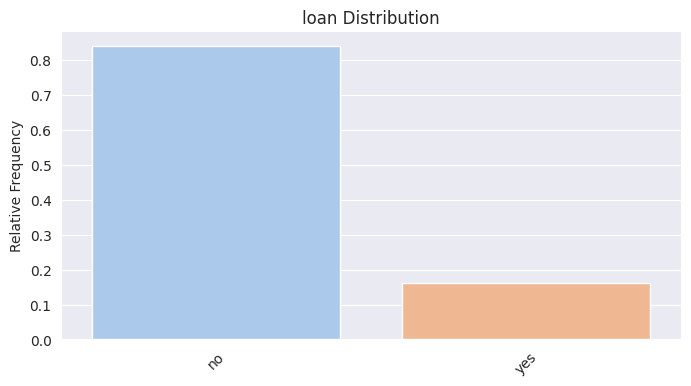

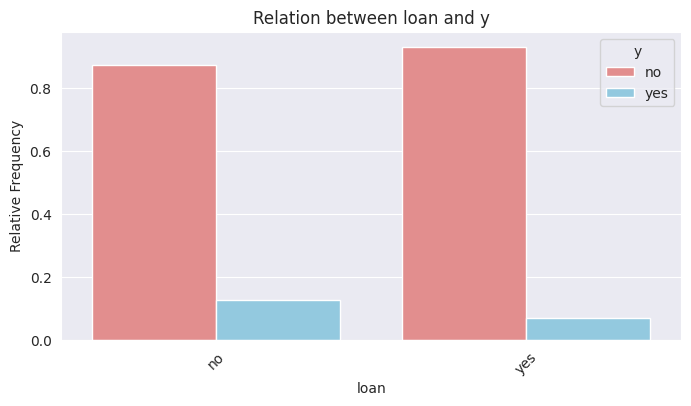

In [ ]:
plot_categorical_distribution(data_train, 'loan', 'y')


El primer gráfico destaca la distribución de préstamos personales:
- **Mayoría Sin Préstamos Personales**: La gran mayoría de los individuos no tienen préstamos personales (`no`).
- **Desequilibrio en la Distribución**: Existe un claro desequilibrio hacia los individuos sin préstamo personal.

El segundo gráfico examina cómo los préstamos personales se relacionan con la variable de resultado `y`:
- **Diferencia en las Tasas de Suscripción**: Los individuos sin préstamos personales muestran una mayor tendencia a no estar suscritos a lo que `y` representa.
- **Menor Contraste para los que Tienen Préstamo**: La diferencia es menos marcada entre los individuos que sí tienen un préstamo personal.

Podemos concluir lo siguiente:

- **Influencia de Préstamos en Decisiones**: Tener un préstamo personal podría afectar la decisión de suscribirse a lo que `y` indica.
- **Relevancia para la Modelización**: A pesar del desequilibrio, la variable `loan` puede ser significativa en modelos predictivos si afecta las tasas de suscripción.
- **Consideraciones para Estrategias Financieras**: Las entidades financieras pueden necesitar adaptar sus productos o estrategias de marketing para reflejar estas diferencias en comportamiento.

Este análisis subraya la necesidad de considerar cómo el estado de préstamo personal de un individuo podría influir en su comportamiento relacionado con la variable `y`.


## Datos del último contacto de la campaña actual

### Análisis de Distribución de Contacto

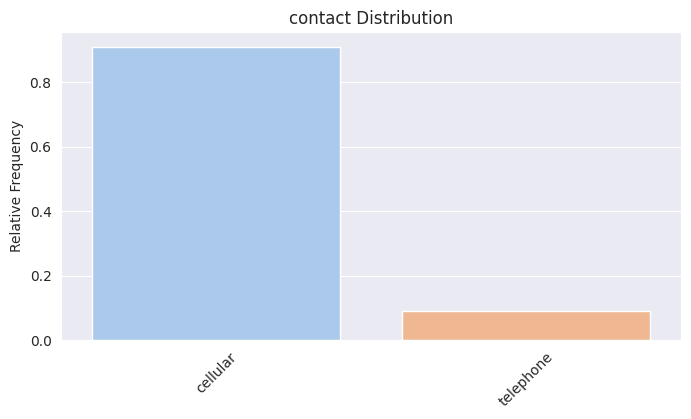

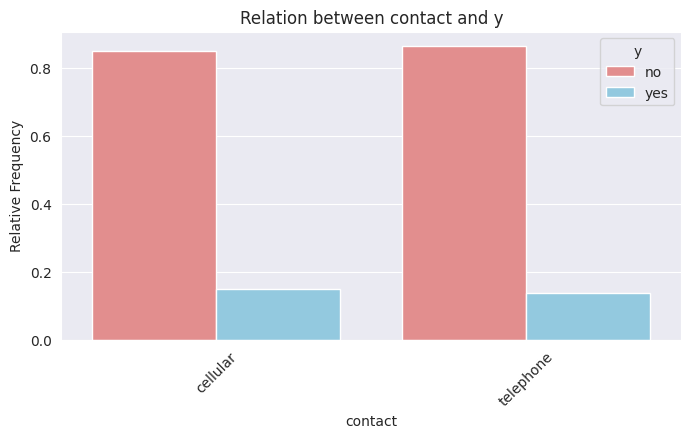

In [ ]:
plot_categorical_distribution(data_train, 'contact', 'y')

**Distribución del Tipo de Contacto**:

El primer gráfico muestra una clara preferencia en la forma de contacto utilizada en la campaña de marketing:
- **Predominio del Uso del Celular**: Una gran mayoría de los contactos se realizan a través de celulares en comparación con los teléfonos fijos.

**Relación entre Tipo de Contacto y Respuesta 'y'**:

El segundo gráfico compara la frecuencia relativa de respuestas positivas (`yes`) y negativas (`no`) en función del tipo de contacto:
- **Respuesta según Tipo de Contacto**: Aunque el contacto celular es más frecuente, la proporción de respuestas positivas en relación con las negativas es ligeramente mayor en el contacto telefónico.
- **Proporción de Respuestas Positivas**: Independientemente del método de contacto, la tasa de respuestas positivas (`yes`) es considerablemente más baja que la de respuestas negativas (`no`).

**Conclusiones y Posibles Acciones**:

- **Evaluación de Estrategias de Contacto**: A pesar de la popularidad del celular, podría valer la pena explorar el uso del teléfono fijo para determinadas estrategias, dada la mayor proporción de respuestas positivas.
- **Optimización de la Campaña**: El análisis sugiere que se debe profundizar en la comprensión de por qué el contacto telefónico tiene una tasa de éxito relativamente mayor, aunque se usa menos.
- **Consideraciones Adicionales**: Sería útil examinar otros factores que puedan influir en la eficacia del tipo de contacto, como el momento del día, el mensaje de la campaña, o el perfil demográfico de los contactados.

De momento, para el modelo predictivo es una variable que a juzgar por su interacción con la salida podríamos empezar a descartar.

### Análisis de Distribución de Día de Contacto

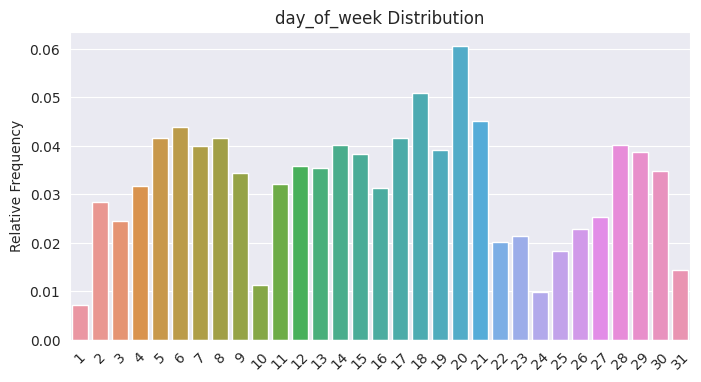

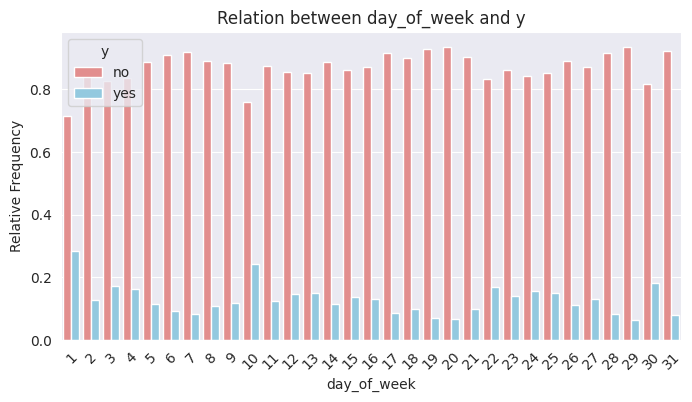

In [ ]:
plot_categorical_distribution(data_train, 'day_of_week', 'y')



**Distribución por Día de la Semana**:

El primer gráfico muestra la frecuencia relativa de contactos para cada día del mes:
- **Variabilidad Diaria**: Hay una variabilidad notable en la frecuencia de contactos a lo largo del mes. Algunos días muestran picos significativos, lo que podría indicar una mayor actividad de marketing en esos días específicos.

**Relación entre Día de la Semana y Respuesta 'y'**:

El segundo gráfico muestra la relación entre el día del mes y la respuesta `y`:
- **Fluctuaciones en la Respuesta**: Hay fluctuaciones en las respuestas positivas (`yes`) en comparación con las negativas (`no`) a lo largo del mes. Aunque la proporción de respuestas `no` domina en general, estos cambios podrían reflejar patrones en la eficacia de la campaña en diferentes días.

**Observaciones y Consideraciones**:

- **Picaduras de Actividad**: Los picos en ciertos días sugieren que podría haber factores específicos impulsando la actividad de contacto en esos momentos, como campañas promocionales o eventos.
- **Impacto en la Respuesta**: Las fluctuaciones en las respuestas `yes` podrían ser un indicador de la receptividad de los clientes a la campaña en diferentes puntos del mes.
- **Análisis Profundo**: Sería recomendable realizar un análisis más profundo de los días con altas tasas de respuesta `yes` para comprender mejor los factores que contribuyen al éxito de la campaña.

La información de estos gráficos puede ser utilizada para optimizar las estrategias de marketing, asegurando que la campaña se ejecute de manera efectiva y en los momentos más oportunos del mes.


Día de la Semana del Último Contacto (day_of_week)
La distribución de la variable "day_of_week" muestra la proporción de clientes según el día de la semana en que fueron contactados por última vez. La relación con la variable de salida "y" indica si esta característica podría ser un predictor relevante.

Conclusiones:

La distribución de contactos es bastante uniforme durante los días de la semana.
La proporción de suscripción y no suscripción no muestra patrones claros según el día de la semana.
Esta variable podría tener un impacto limitado en la predicción y debe evaluarse en conjunto con otras.

### Análisis de Distribución de Mes de Contacto

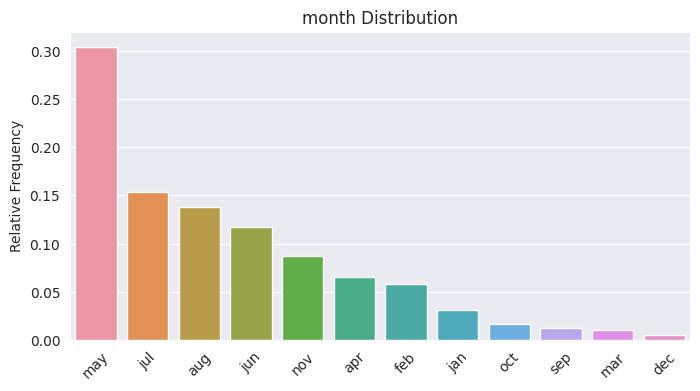

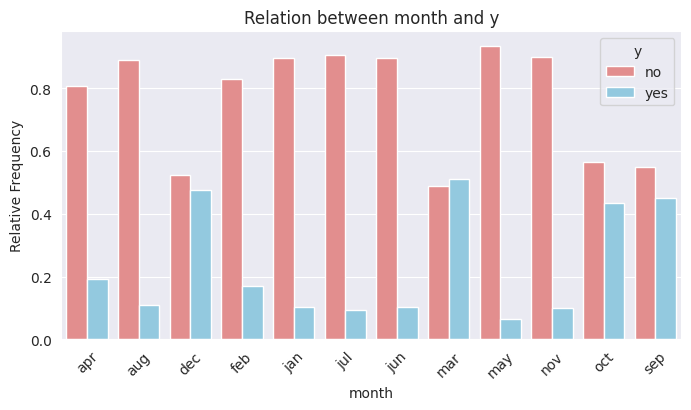

In [ ]:
plot_categorical_distribution(data_train, 'month', 'y')

Mes del Último Contacto (month)
La distribución de la variable "month" muestra la proporción de clientes según el mes en que fueron contactados por última vez. La relación con la variable de salida "y" indica si esta característica podría ser un predictor relevante.

**Distribución Mensual:**

El primer gráfico muestra la frecuencia relativa de los contactos por mes:
- **Actividad Alta en Mayo**: Se observa un pico significativo de actividad en mayo, seguido de una presencia notable en julio y agosto.
- **Menor Actividad en el Invierno**: Los meses de otoño e invierno (octubre a diciembre) muestran una menor cantidad de contactos.

**Relación entre Mes y Respuesta 'y':**

El segundo gráfico compara la frecuencia relativa de respuestas positivas y negativas por mes:
- **Tasas Variables de Respuesta**: Los meses de marzo, septiembre y diciembre muestran una proporción relativamente alta de respuestas afirmativas en comparación con otros meses.
- **Contraste con la Frecuencia de Contacto**: Aunque mayo tiene la mayor frecuencia de contactos, no tiene la mayor proporción de respuestas positivas, lo que sugiere que la cantidad de contactos no se correlaciona directamente con una mayor tasa de éxito.

**Implicaciones y Estrategias:**

- **Revisión de Campañas Mensuales**: Los datos sugieren que las campañas en ciertos meses pueden ser más efectivas que en otros, lo que justifica una revisión de las estrategias mensuales.
- **Ajustes de Temporada**: La variabilidad en las tasas de éxito mensuales puede estar relacionada con factores estacionales que afectan la disponibilidad o la receptividad del cliente.
- **Optimización de Recursos**: Los recursos de marketing podrían asignarse de manera más eficiente al centrarse en los meses con mayores tasas de éxito y reevaluar las campañas en los meses con menor rendimiento.

Estos análisis ofrecen una oportunidad para afinar la programación de las campañas de marketing y explorar más a fondo las razones detrás de las variaciones mensuales en las tasas de respuesta.



### Análisis de Distribución de Duración del Contacto

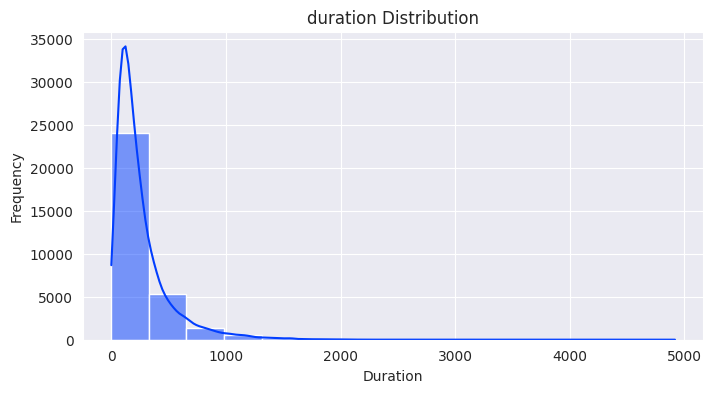

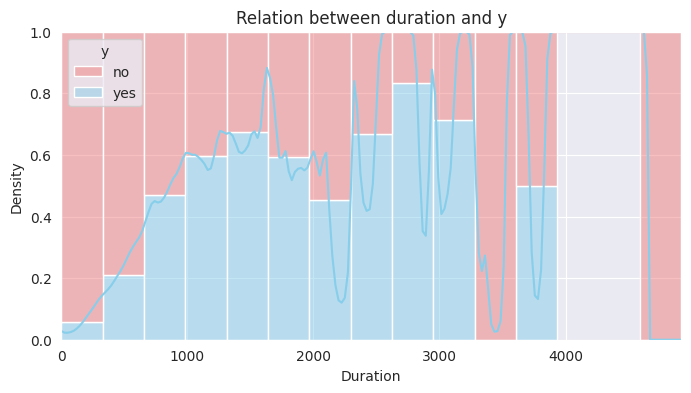

In [ ]:
plot_numerical_distribution(data_train, 'duration', 'y', figsize=(8,4))

- **Sesgo Positivo**: Existe un claro sesgo hacia las duraciones más cortas, lo que indica que la mayoría de los contactos son breves.
- **Llamadas Largas Infrecuentes**: Las llamadas de mayor duración son menos frecuentes, lo que puede reflejar una tendencia a concluir llamadas sin éxito rápidamente.

**Relación entre la Duración del Contacto y la Suscripción ('y'):**
- **Efectividad de Duraciones Intermedias**: La densidad de suscripciones ('yes') muestra picos para duraciones de llamada específicas, sugiriendo que existe un rango óptimo que maximiza las conversiones.
- **Disminución de la Conversión en Llamadas Extensas**: Las llamadas muy largas parecen tener una menor proporción de suscripciones, lo que podría indicar un punto de disminución de rendimiento donde la duración adicional no contribuye a resultados positivos.

**Implicaciones Estratégicas:**
- **Duración Óptima**: Identificar y apuntar a la duración óptima de la llamada puede ayudar a mejorar las tasas de conversión de la campaña.
- **Capacitación de Agentes**: Entrenar a los agentes para manejar las llamadas dentro de los intervalos de tiempo más efectivos podría ser una estrategia clave.
- **Análisis Detallado**: Un análisis más detallado de las interacciones dentro de los picos de éxito podría ofrecer información sobre las estrategias de comunicación más efectivas.


## Otros Datos:

### Análisis de Distribución de Contactos en Campaña Actual

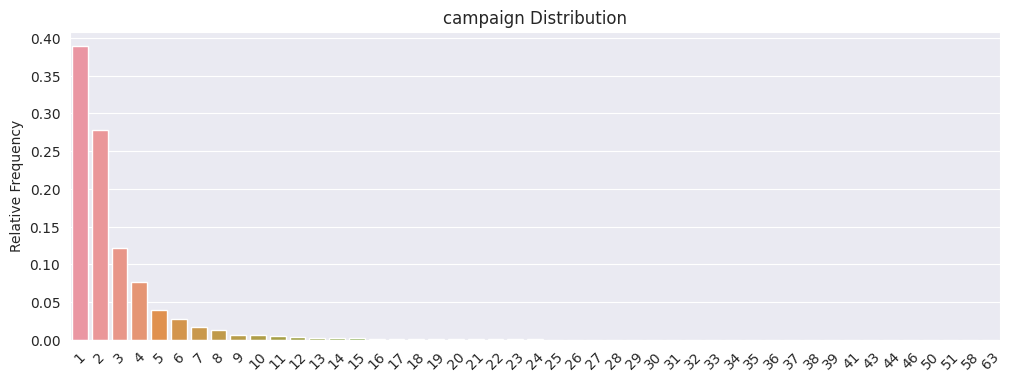

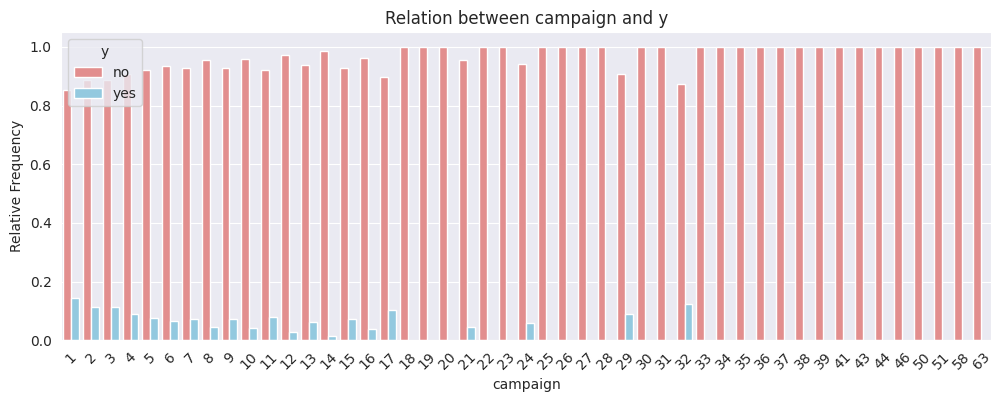

In [ ]:
plot_categorical_distribution(data_train, 'campaign', 'y', s=(12,4))

Número de Contactos en la Campaña Actual (campaign)
La distribución de la variable "campaign" muestra la proporción de clientes según el número de contactos realizados durante la campaña actual. La relación con la variable de salida "y" indica si esta característica podría ser un predictor relevante.

**Distribución de la Cantidad de Contactos:**

El primer gráfico ilustra la frecuencia relativa de la cantidad de contactos realizados a clientes durante la campaña:
- **Predominancia de Pocos Contactos**: Se observa que la mayoría de los clientes fueron contactados una o dos veces, con una disminución rápida en la frecuencia a medida que aumenta el número de contactos.
- **Rareza de Múltiples Contactos**: Los contactos que superan las 10 comunicaciones son extremadamente raros, lo que indica una tendencia a limitar el número de intentos de contacto con un mismo cliente.

**Relación entre la Cantidad de Contactos y Respuesta 'y':**

El segundo gráfico muestra cómo la cantidad de contactos se relaciona con las respuestas afirmativas y negativas de los clientes:
- **Tasa de Éxito en los Primeros Contactos**: La tasa de éxito (respuestas 'yes') parece ser más alta en los primeros contactos, disminuyendo significativamente para cantidades mayores de intentos de contacto.
- **Disminución de la Efectividad con Más Contactos**: Existe una marcada disminución en la proporción de respuestas positivas a medida que aumenta la cantidad de contactos, lo que podría sugerir un desgaste o molestia por parte de los clientes ante la insistencia.

**Implicaciones y Estrategias:**

- **Optimización de la Estrategia de Contacto**: El análisis sugiere que las estrategias de contacto deben centrarse en hacer menos intentos de calidad, evitando saturar a los clientes con múltiples llamadas.
- **Reevaluación de la Persistencia en la Campaña**: Es esencial reevaluar la eficacia de la persistencia en las comunicaciones, ya que la tasa de éxito disminuye con el aumento de contactos.
- **Análisis de Enfoque Personalizado**: Debe considerarse si un enfoque más personalizado después del primer contacto puede mejorar la tasa de éxito en lugar de aumentar simplemente la cantidad de contactos.

Este análisis revela patrones importantes en la estrategia de contacto de la campaña de marketing que pueden ser ajustados para mejorar la tasa de éxito de suscripción a los productos ofrecidos.


### Análisis de Distribución de Días Transcurridos

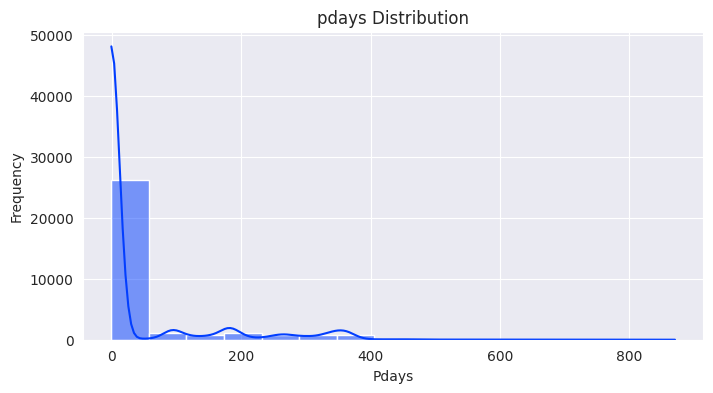

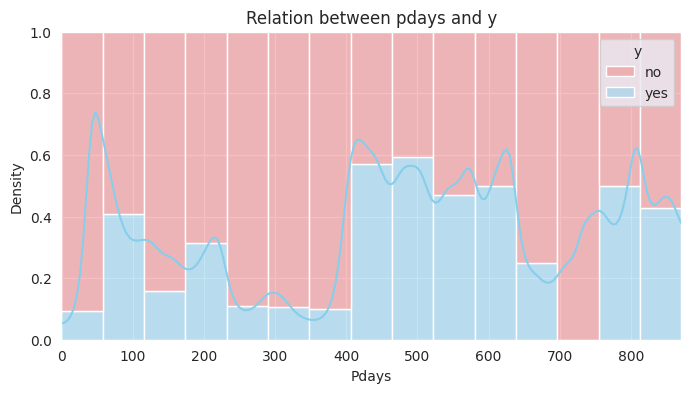

In [ ]:
plot_numerical_distribution(data_train, 'pdays', 'y', figsize=(8, 4))

**Distribución de 'pdays':**

El primer gráfico muestra la frecuencia de los días transcurridos desde el último contacto de la campaña anterior (`pdays`):
- **Concentración en `-1` Días**: Un pico prominente en `-1` días indica que muchos clientes nunc ahabían sido contactados antes.
- **Larga Cola de Distribución**: La distribución tiene una larga cola, lo que significa que algunos clientes no han sido contactados en mucho tiempo.

**Relación entre 'pdays' y Respuesta 'y':**

El segundo gráfico compara la densidad de las respuestas afirmativas (`yes`) y negativas (`no`) con respecto a `pdays`:
- **Variaciones en la Tasa de Éxito**: La tasa de éxito varía con el número de días transcurridos desde el último contacto, mostrando picos y valles a lo largo de la distribución.
- **Posible Efecto de 'Recencia'**: Parece haber una relación entre la 'recencia' del contacto y la probabilidad de una respuesta positiva, con ciertos periodos desde el último contacto que muestran tasas más altas de respuesta positiva.

**Implicaciones y Estrategias:**
- **Importancia del Seguimiento**: La distribución sugiere que el seguimiento oportuno después de los contactos previos puede ser importante para el éxito de la campaña actual.
- **Reevaluación de Intervalos de Contacto**: Podría ser útil reevaluar la estrategia de cuándo y con qué frecuencia se contacta a los clientes después de la última interacción para maximizar las tasas de éxito.
- **Análisis Detallado de 'pdays'**: Un análisis más detallado de los periodos específicos donde la tasa de éxito es más alta podría ofrecer insights para planificar el momento de los contactos en futuras campañas.

Este análisis resalta la posible importancia de la 'recencia' de contacto en la respuesta de los clientes, sugiriendo que un seguimiento estratégico y bien planificado podría influir positivamente en las tasas de suscripción. Sin embargo, no la usaremos para la creación de nuestros modelos.


### Análisis de Distribución de Contactos en Campaña Previa

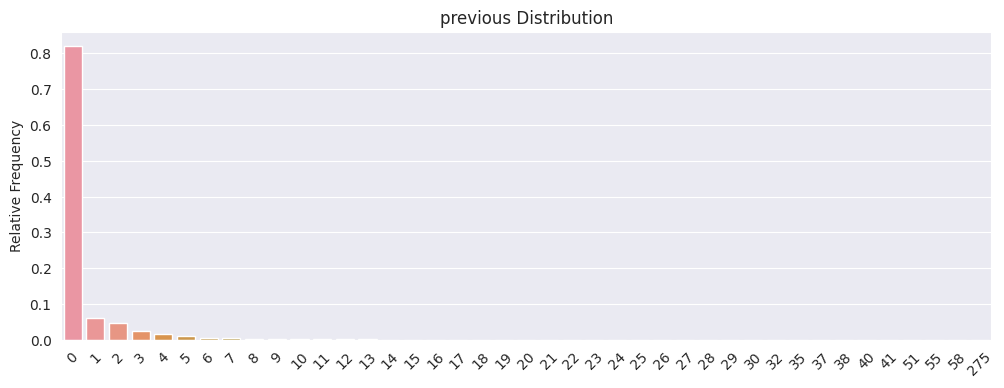

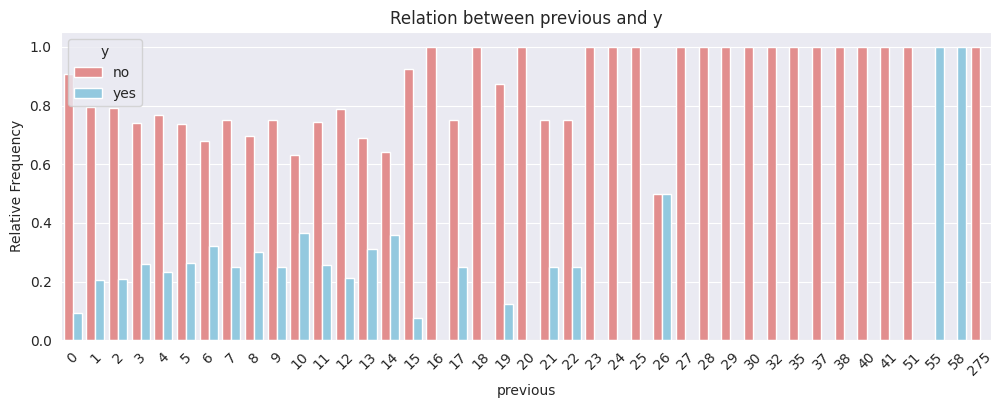

In [ ]:
plot_categorical_distribution(data_train, 'previous', 'y', s=(12,4))

**Distribución de Contactos Previos:**

El primer gráfico muestra la frecuencia relativa de la cantidad de contactos previos realizados a los clientes:
- **Mayoría Sin Contactos Previos**: La gran mayoría de los clientes no tuvieron contactos previos, como se indica por la barra correspondiente a cero.
- **Pocos Contactos Previos**: Un número muy reducido de clientes tuvo uno o más contactos previos, y la frecuencia disminuye a medida que aumenta el número de contactos.

**Relación entre Contactos Previos y Respuesta 'y':**

El segundo gráfico compara la frecuencia relativa de las respuestas `yes` y `no` en función de la cantidad de contactos previos:
- **Tasa de Respuesta Positiva y Contactos Previos**: Aunque la mayoría de los clientes no tuvieron contactos previos, aquellos con algunos contactos previos muestran una proporción de respuestas `yes` que varía y no muestra un patrón claro de aumento o disminución consistente con el número de contactos previos.
- **Disminución de la Efectividad con Muchos Contactos Previos**: Para un número alto de contactos previos, la proporción de respuestas `yes` parece disminuir, aunque estos casos son poco frecuentes.

**Conclusiones y Posibles Acciones:**

- **Relevancia de los Contactos Previos**: Los contactos previos no parecen ser un indicador fuerte de una respuesta positiva en la campaña actual, lo que sugiere que otros factores pueden estar desempeñando un papel más significativo en la decisión del cliente.
- **Estrategia de Seguimiento**: Es importante considerar la calidad y el resultado de los contactos previos al diseñar estrategias de seguimiento, en lugar de basarse solo en la cantidad de contactos previos.
- **Análisis Adicional**: Sería beneficioso realizar un análisis adicional para comprender mejor la naturaleza de los contactos previos y cómo estos influyen en la respuesta del cliente, especialmente en casos de múltiples contactos previos.

Este análisis destaca la importancia de considerar la historia completa de la interacción con el cliente al planificar y ejecutar campañas de marketing para mejorar las tasas de éxito.


### Análisis de Distribución de Resultado Anterior

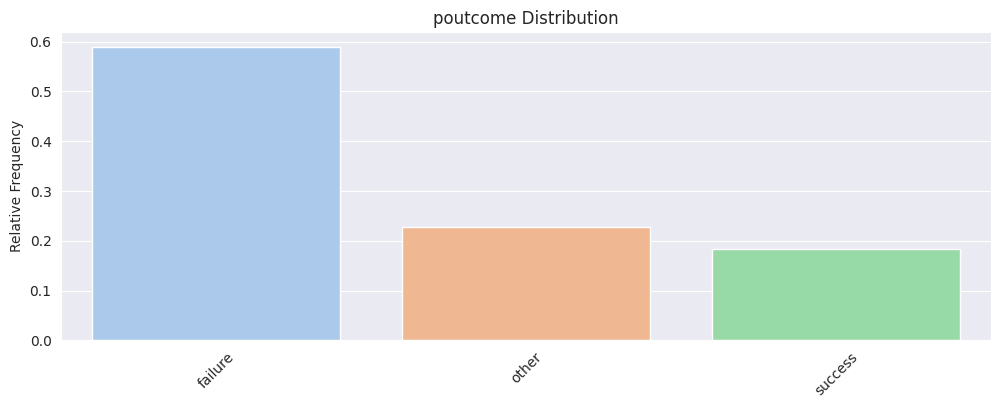

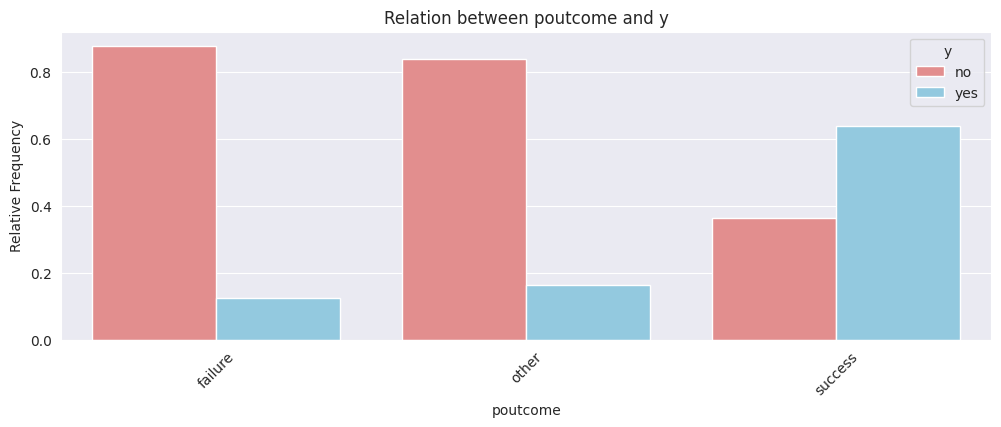

In [ ]:
plot_categorical_distribution(data_train, 'poutcome', 'y', s=(12,4))



**Distribución del Resultado de la Campaña Anterior:**

El primer gráfico muestra la frecuencia relativa de los resultados de la campaña de marketing anterior:
- **Alta Frecuencia de Fallos**: La categoría `failure` representa la mayoría de los resultados, lo que sugiere que las campañas anteriores no tuvieron éxito en muchos casos.
- **Menor Frecuencia de Éxitos**: El resultado `success` tiene la menor frecuencia, indicando que hubo menos casos de éxito en la campaña anterior.

**Relación entre el Resultado de la Campaña Anterior y la Respuesta 'y':**

El segundo gráfico compara la frecuencia relativa de las respuestas `yes` y `no` con respecto al resultado de la campaña anterior:
- **Mayor Tasa de Éxito con Resultados Previos Exitosos**: Hay una mayor proporción de respuestas `yes` entre los clientes cuya campaña anterior fue un `success`, lo que podría indicar que el éxito anterior aumenta la probabilidad de una respuesta positiva en la campaña actual.
- **Impacto Negativo de los Fallos Previos**: Por otro lado, los clientes con un resultado `failure` en la campaña anterior muestran una mayor proporción de respuestas `no` en la actual.

**Implicaciones y Estrategias:**

- **Importancia del Éxito Anterior**: La influencia positiva de un resultado previo exitoso sobre la respuesta actual resalta la importancia de construir relaciones positivas y de largo plazo con los clientes.
- **Reconsideración de Estrategias para Fallos Previos**: La aparente relación negativa entre los fallos anteriores y las respuestas actuales sugiere que se deben reconsiderar o renovar las estrategias de acercamiento a estos clientes.
- **Análisis de Factores Influyentes**: Sería beneficioso examinar más a fondo los factores que llevaron a los resultados de `success` y `failure` en campañas anteriores para informar mejor las estrategias de marketing actuales y futuras.

Este análisis sugiere que las experiencias previas de los clientes con campañas de marketing pueden tener un impacto significativo en su comportamiento actual y que comprender estos patrones puede ser crucial para el éxito de las campañas en curso y futuras.


## Resumen y Consideraciones Finales

**Variables Relevantes:** Algunas variables categóricas, como "job", "housing", "loan", "contact", "education" y "campaign", parecen tener una relación significativa con la variable de salida "y". Estas variables pueden ser relevantes para la predicción y deben incluirse en el modelo.

**Desbalance de Clases:** La proporción de suscripción y no suscripción muestra un desbalance, con la mayoría de los clientes no suscribiéndose al producto. Se debe considerar el manejo adecuado de clases desbalanceadas durante el entrenamiento del modelo.

**Análisis Multivariante:** Es crucial realizar un análisis más detallado que considere múltiples variables simultáneamente para comprender las interacciones y patrones complejos en los datos.

**Preprocesamiento de Datos:** Se debe realizar el preprocesamiento de datos, incluida la codificación de variables categóricas, manejo de valores faltantes y otras transformaciones necesarias antes de entrenar el modelo de clasificación.

**Selección de Variables:** La selección de variables puede ser explorada para identificar las características más influyentes en el modelo.

**Evaluación de Modelos:** Se deben entrenar y evaluar diferentes modelos de clasificación, como modelos de regresión logística, árboles de decisión o modelos de redes neuronales, para determinar el rendimiento y la eficacia del modelo en la predicción de la suscripción al producto.

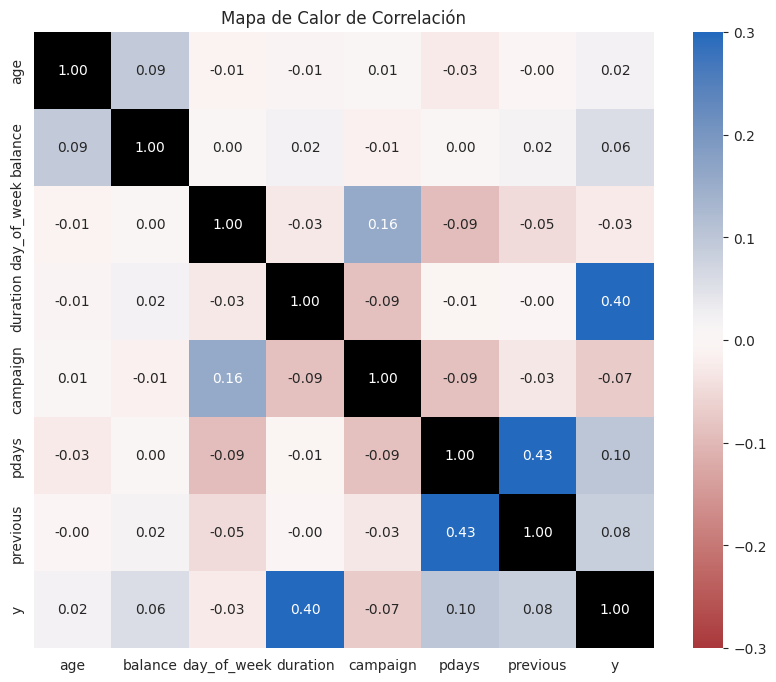

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Crear una copia de data_train para la manipulación de datos
# Supongamos que 'data_train' es el DataFrame original que contiene tus datos
data_train_copy = data_train.copy()

# Convertir la columna 'y' a numérica (1 para 'yes', 0 para 'no')
data_train_copy['y'] = data_train_copy['y'].map({'yes': 1, 'no': 0})

# Seleccionar solo las columnas numéricas para la matriz de correlación
numeric_columns = data_train_copy.select_dtypes(include=['int64', 'float64']).columns

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = data_train_copy[numeric_columns].corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
diagonal_mask = np.eye(len(correlation_matrix), dtype=bool)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='vlag_r', center=0, mask=diagonal_mask, vmin=-0.3, vmax=0.3)
sns.heatmap(correlation_matrix, cmap=['black'], mask=~diagonal_mask, annot=True, cbar=False, fmt=".2f")

plt.title('Mapa de Calor de Correlación')
plt.show()


**Interpretación General**

- Los valores de correlación oscilan entre -0.3 y 0.4, lo que indica ausencia de correlaciones fuertes en general.

**Análisis de Variables Numéricas**
- **`duration` y `y`**: Con una correlación de 0.40, existe una relación moderadamente positiva, lo que sugiere que llamadas de mayor duración podrían influir positivamente en la suscripción del producto.
- **`pdays` y `previous`**: Una correlación de 0.43 indica una relación moderada, lo que podría sugerir que clientes previamente contactados tienen más probabilidad de ser contactados nuevamente.
- **`campaign` y `day_of_week`**: Una correlación leve de 0.16 podría indicar una pequeña tendencia a que ciertos días de la semana se asocian con más contactos de campaña.
- **`duration` y `day_of_week`**: La correlación negativa de -0.09 es débil, sugiriendo que no hay una relación significativa entre la duración de las llamadas y el día específico de la semana.

**Consideraciones Adicionales**

- Las correlaciones bajas no implican la ausencia de relación, ya que no capturan dinámicas no lineales ni interacciones entre múltiples variables.
- Las variables `age` y `balance` tienen correlaciones débiles con `y`, pero en los análisis de variables individuales puddimos ver qque si tenían cierta influencia en la variable de salida, solo que con relaciones no lineales.
- La ausencia de correlaciones perfectas sugiere que no hay redundancia directa entre las variables.


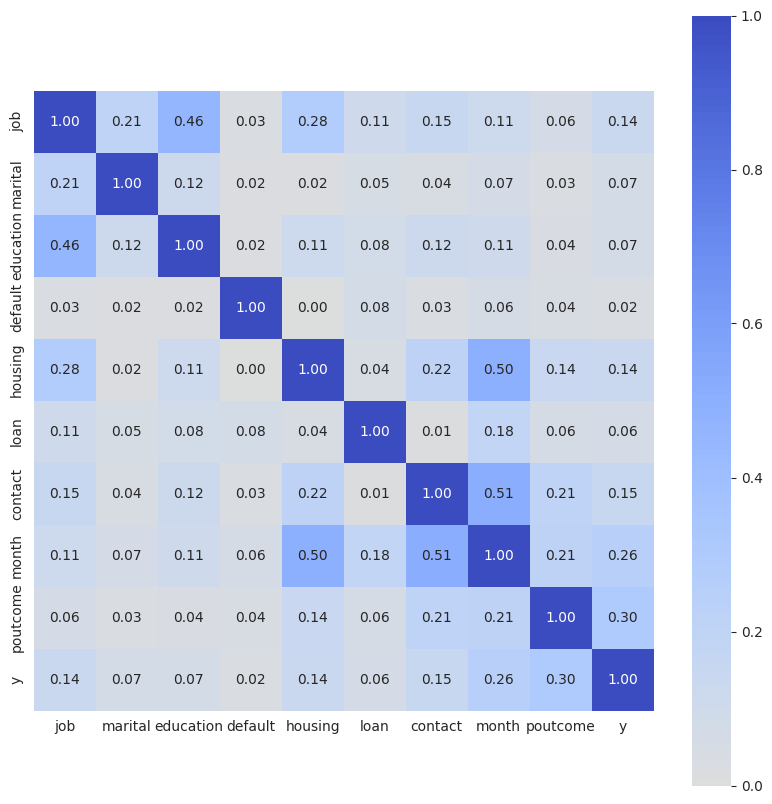

In [ ]:
from dython.nominal import identify_nominal_columns, associations

categorical_features=identify_nominal_columns(data_train)
selected_columns = data_train[categorical_features]
categorical_df = selected_columns.copy()

# Generar la matriz de correlación para las variables categóricas
categorical_correlation = associations(categorical_df, figsize=(10,10), cmap='coolwarm_r')

**Interpretación General**

- Los valores oscilan entre 0 y 1, indicando la fuerza de la asociación entre las variables.
- Un valor de 1 en la diagonal es esperado, ya que representa la asociación de cada variable consigo misma.

**Análisis de Asociaciones Específicas**

- **`job` y `y`**: Una asociación de 0.14 sugiere una relación leve entre el tipo de trabajo y la variable de salida `y`.
- **`housing` y `loan`**: Una asociación de 0.50 indica una relación moderada, posiblemente reflejando que aquellos con préstamos hipotecarios también pueden tener préstamos personales.
- **`contact` y `month`**: Con una asociación de 0.51, parece haber una relación moderada que podría reflejar patrones estacionales o de planificación en la campaña de contacto.
- **`poutcome` y `y`**: Una asociación de 0.30 implica una relación moderada, sugiriendo que el resultado de la campaña anterior impacta en la suscripción actual.

# Tratamiento de Datos

Ahora que tenemos una noción de como se comportan los datos, podemos decidir como transformarlos. Entre las transformaciones qu eponemos hacerles, están de convertir algunas columnas de continuas/num´ricas a categóricas. Para ello, implmenetaremos el algoritmos de K-Means en los valores del balance disponible, dejaremos la duración de las llamadas como variable continua, y discretizaremos la edad, ya que no parece tener una relación lineal con la salida y nos podríamos beneficiar de usarla categórica (será separada en grupos con el criterio de Sturges).

In [ ]:
display(data.head(10).style.hide(axis="index"))

age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,nan,5,may,261,1,-1,0,nan,no
44,technician,single,secondary,no,29,yes,no,nan,5,may,151,1,-1,0,nan,no
33,entrepreneur,married,secondary,no,2,yes,yes,nan,5,may,76,1,-1,0,nan,no
47,blue-collar,married,nan,no,1506,yes,no,nan,5,may,92,1,-1,0,nan,no
33,nan,single,nan,no,1,no,no,nan,5,may,198,1,-1,0,nan,no
35,management,married,tertiary,no,231,yes,no,nan,5,may,139,1,-1,0,nan,no
28,management,single,tertiary,no,447,yes,yes,nan,5,may,217,1,-1,0,nan,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,nan,5,may,380,1,-1,0,nan,no
58,retired,married,primary,no,121,yes,no,nan,5,may,50,1,-1,0,nan,no
43,technician,single,secondary,no,593,yes,no,nan,5,may,55,1,-1,0,nan,no


In [ ]:
print('Total de filas:', data.shape[0])
display(data.dtypes)

Total de filas: 45211


age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [ ]:
display(data_train.head(10).style.hide(axis="index"))

age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
31,services,married,secondary,no,1,yes,no,cellular,9,jul,82,1,-1,0,nan,no
35,services,married,secondary,no,195,yes,no,cellular,17,apr,203,1,-1,0,nan,no
24,blue-collar,single,secondary,no,77,yes,no,nan,16,may,236,2,-1,0,nan,no
35,blue-collar,married,secondary,no,80,yes,yes,nan,2,jun,579,2,-1,0,nan,no
37,services,single,secondary,no,105,no,yes,cellular,21,nov,197,2,157,4,failure,no
38,blue-collar,married,secondary,no,361,yes,no,nan,11,jun,601,1,-1,0,nan,no
68,retired,married,tertiary,no,2820,no,no,cellular,28,aug,109,2,-1,0,nan,no
36,housemaid,married,tertiary,yes,-1941,yes,no,nan,16,jun,505,1,-1,0,nan,no
70,retired,married,nan,no,1236,no,no,cellular,12,mar,58,4,-1,0,nan,no
38,technician,single,secondary,no,12926,yes,no,nan,3,jun,280,1,-1,0,nan,no


In [ ]:
print('Total de filas:', data_train.shape[0])
display(data_train.dtypes)

Total de filas: 31647


age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [ ]:
def show_labels(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    for col in categorical_columns:
        print(f"Unique labels for {col}:", data[col].unique().tolist())

In [ ]:
show_labels(data_train)

Unique labels for job: ['management', 'technician', 'entrepreneur', 'blue-collar', nan, 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Unique labels for marital: ['married', 'single', 'divorced']
Unique labels for education: ['tertiary', 'secondary', nan, 'primary']
Unique labels for default: ['no', 'yes']
Unique labels for housing: ['yes', 'no']
Unique labels for loan: ['no', 'yes']
Unique labels for contact: [nan, 'cellular', 'telephone']
Unique labels for month: ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep']
Unique labels for poutcome: [nan, 'failure', 'other', 'success']
Unique labels for y: ['no', 'yes']


In [ ]:
def place_unknown(df):
    # Identificar las columnas categóricas.
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns

    # Convertir las cadenas 'nan' a NaN de NumPy para asegurarse de que sean reconocidos por fillna
    df.replace('nan', np.nan, inplace=True)

    # Reemplazar NaN por 'Unknown' en todas las columnas categóricas.
    for col in categorical_columns:
        df[col] = df[col].fillna('Unknown')

    return df

# Crear una copia de 'data_train' para no modificar el DataFrame original
data_train_copy = data_train.copy()

# Aplicar la función al DataFrame copiado
train_data_cleaned = place_unknown(data_train_copy)

El número óptimo de clusters es: 2


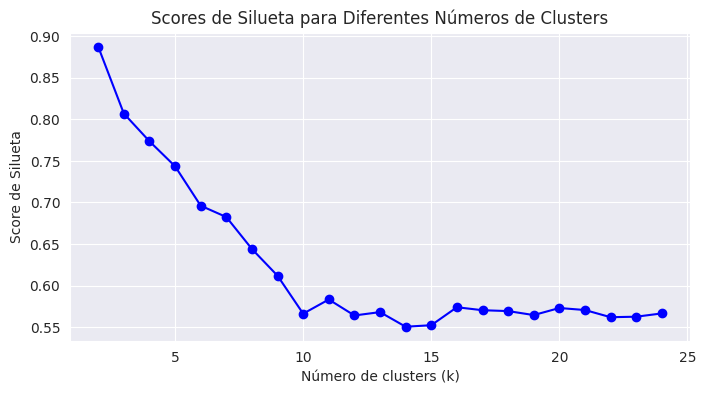

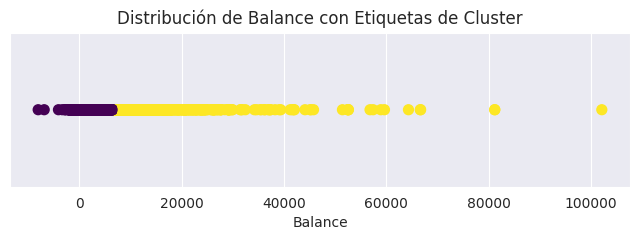

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Primero, estandarizamos la columna 'balance'
scaler = StandardScaler()
balance_scaled = scaler.fit_transform(data_train[['balance']])

# Utilizamos una muestra aleatoria de datos para calcular el score de silueta
# para reducir la carga computacional
sample_size = int(len(balance_scaled) * 0.1)  # Por ejemplo, usar el 10% de los datos
indices = np.random.choice(range(len(balance_scaled)), size=sample_size, replace=False)
balance_sampled = balance_scaled[indices]

# Determinar el número óptimo de clusters utilizando el score de silueta
silhouette_scores = []
K = range(2, 25)  # Evaluamos un rango razonable de valores de K

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(balance_sampled)
    # Calcular el score de silueta utilizando solo la muestra de datos
    labels_sampled = kmeans.predict(balance_sampled)
    score = silhouette_score(balance_sampled, labels_sampled)
    silhouette_scores.append(score)

# Encontrar el número óptimo de clusters con el score de silueta más alto
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"El número óptimo de clusters es: {optimal_k}")

# Realizar el clustering con el número óptimo de clusters utilizando todos los datos
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_optimal.fit(balance_scaled)

# Asignar las etiquetas de clusters al DataFrame original
data_train['cluster'] = kmeans_optimal.labels_

# Visualizar los scores de silueta para diferentes números de clusters
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Score de Silueta')
plt.title('Scores de Silueta para Diferentes Números de Clusters')
plt.show()

# Graficar la distribución original de los datos con las etiquetas de cluster
plt.figure(figsize=(8, 2))
plt.scatter(data_train['balance'], np.zeros_like(data_train['balance']), c=data_train['cluster'], cmap='viridis', s=50)
plt.xlabel('Balance')
plt.title('Distribución de Balance con Etiquetas de Cluster')
plt.yticks([])  # Eliminar las marcas del eje y ya que no son relevantes
plt.show()

Como podemos observar, la mejor silta no nos da la que sería la separación más intuitiva. Por haber visto como se comporta el gráfico, hemos decidido guardar 15 grupos, para luego asignarles una label a cada dato.

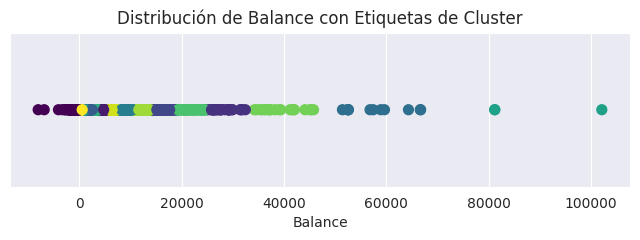

In [ ]:
# Realizar el clustering con el número óptimo de clusters utilizando todos los datos
kmeans_optimal = KMeans(n_clusters=15, init='k-means++', random_state=42, n_init=10)
kmeans_optimal.fit(balance_scaled)

# Asignar las etiquetas de clusters al DataFrame original
data_train['cluster'] = kmeans_optimal.labels_

# Graficar la distribución original de los datos con las etiquetas de cluster
plt.figure(figsize=(8, 2))
plt.scatter(data_train['balance'], np.zeros_like(data_train['balance']), c=data_train['cluster'], cmap='viridis', s=50)
plt.xlabel('Balance')
plt.title('Distribución de Balance con Etiquetas de Cluster')
plt.yticks([])  # Eliminar las marcas del eje y ya que no son relevantes
plt.show()

## Esquemas de Entrenamiento y Validación

### Entrenamiento de Redes Neuronales

El entrenamiento de redes neuronales es un proceso iterativo donde un modelo aprende de los datos. Se compone de los siguientes pasos:

#### 1. **Definición de la Arquitectura**:
   - Creación de una clase de red neuronal (`nn.Module`) con capas lineales (`nn.Linear`) y funciones de activación (`F.relu`).

#### 2. **Inicialización del Modelo**:
   - Instanciación del modelo con la arquitectura definida y especificación del tamaño de entrada (`input_size`).

#### 3. **Preparación de Datos**:
   - Conversión de datos a tensores de PyTorch y creación de conjuntos de datos (`TensorDataset`) y cargadores de datos (`DataLoader`).

#### 4. **Definición de la Función de Pérdida y Optimizador**:
   - Selección de una función de pérdida adecuada (como `nn.CrossEntropyLoss` para clasificación) y un optimizador (como `optim.Adam`).

#### 5. **Bucle de Entrenamiento**:
   - Entrenamiento iterativo del modelo en mini-lotes: cálculo de la pérdida, retropropagación y actualización de pesos.

### Validación y Pruebas

Estos pasos son críticos para evaluar y mejorar el modelo:

#### 1. **Evaluación Durante el Entrenamiento**:
   - Uso de un conjunto de validación para monitorizar el rendimiento del modelo y ajustar hiperparámetros.

#### 2. **Validación Cruzada**:
   - Implementación de K-Fold Cross-Validation (`KFold`) para una evaluación robusta y generalizada.

#### 3. **Métricas de Rendimiento**:
   - Cálculo de métricas como precisión, sensibilidad, valor predictivo y matriz de confusión y grárficas ROC.

### Técnicas Avanzadas

#### 1. **Modelos Dinámicos**:
   - Creación de modelos con arquitecturas dinámicas (`DynamicNet`) que permiten fácil modificación de capas y funciones de activación.

#### 4. **Uso de Intervalos de Confianza**:
   - Aplicación de métodos de bootstrap para generar intervalos de confianza para las métricas de rendimiento.

### Implementación Práctica

#### 1. **Creación de Modelos Personalizados**:
   - Definición de nuevas arquitecturas de red según los requerimientos específicos del problema.

#### 2. **Entrenamiento y Evaluación Generalizados**:
   - Desarrollo de funciones para entrenamiento y evaluación que pueden ser fácilmente adaptadas a diferentes modelos y conjuntos de datos.

#### 3. **Visualización de Resultados**:
   - Uso de bibliotecas como Matplotlib y Seaborn para graficar pérdidas de entrenamiento, métricas de rendimiento y matrices de confusión.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd

def preprocess_data(df):
    # Copia del dataframe para no modificar el original
    df_copy = df.copy()

    # Eliminar columnas no deseadas
    df_copy.drop(columns=["campaign", "pdays", "previous"], inplace=True)

    # Reemplazo de NaN por 'Unknown' en columnas categóricas
    categorical_cols = df_copy.select_dtypes(include=['object', 'category']).columns
    df_copy[categorical_cols] = df_copy[categorical_cols].fillna('Unknown')

    # Identificar columnas numéricas
    numeric_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns

    # Crear el transformador de columnas categóricas con OneHotEncoder
    categorical_transformer = Pipeline(steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Crear el transformador de columnas numéricas con StandardScaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Aplicar el transformador al dataframe
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    # Fit y transformar los datos
    df_processed = preprocessor.fit_transform(df_copy)

    # Convertir el resultado en un dataframe y agregar los nombres de las nuevas columnas
    cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
    all_columns = numeric_cols.tolist() + cat_columns.tolist()
    df_processed = pd.DataFrame(df_processed.toarray(), columns=all_columns)  # Convertir a array si es necesario

    return df_processed, preprocessor

# Aplicar la función al conjunto de datos de entrenamiento
X_train_processed, preprocessor = preprocess_data(X_train)

# Muestra las primeras filas del dataframe procesado
display(X_train_processed)

,age,balance,day_of_week,duration,job_Unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_Unknown,poutcome_failure,poutcome_other,poutcome_success
0,-0.930461,-0.443813,-0.817039,-0.680152,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.553871,-0.380625,0.143236,-0.214545,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.589493,-0.419059,0.023201,-0.087562,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.553871,-0.418082,-1.657280,1.232298,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.365576,-0.409939,0.623373,-0.237633,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.387603,-0.418408,1.103510,-0.618584,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31643,-1.024608,-0.054586,1.343579,-0.430032,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31644,-1.307051,0.389361,-1.177142,-0.122193,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31645,-0.836314,-0.444139,-0.817039,-0.649368,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [365]:
from sklearn.model_selection import train_test_split

# Se hace la partición conservando distribución por clase original
X_train, X_test, y_train, y_test = train_test_split(bank_marketing.data.features,
        bank_marketing.data.targets, test_size=0.3, stratify=y, random_state=42)

# Create the complete training data table by concatenating the features and the target variable
data_train = pd.concat([X_train, y_train], axis=1)

In [366]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Función para preprocesar los datos
def preprocess_data(df):
    # Copia del dataframe para no modificar el original
    df_copy = df.copy()

    # Eliminar columnas no deseadas
    df_copy.drop(columns=["campaign", "pdays", "previous"], inplace=True)

    # Reemplazo de NaN por 'Unknown' en columnas categóricas
    categorical_cols = df_copy.select_dtypes(include=['object', 'category']).columns
    df_copy[categorical_cols] = df_copy[categorical_cols].fillna('Unknown')

    # Identificar columnas numéricas para normalización, incluyendo 'duration'
    numeric_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.difference(['age', 'day_of_week', 'balance'])
    # Aquí se incluye 'duration' en 'numeric_cols'

    # Convertir 'day_of_week' y 'age' a categóricas
    df_copy['day_of_week'] = df_copy['day_of_week'].astype('category')
    df_copy['age_bins'] = pd.cut(df_copy['age'], bins=15).astype('category')

    # Crear clusters para 'balance' utilizando KMeans
    kmeans_balance = KMeans(n_clusters=15, random_state=42, init='k-means++', n_init=10)
    df_copy['balance_cluster'] = kmeans_balance.fit_predict(df_copy[['balance']])
    df_copy['balance_cluster'] = df_copy['balance_cluster'].astype('category')

    # Actualizar las columnas categóricas para incluir las nuevas categóricas y eliminar las originales
    categorical_cols = categorical_cols.union(['age_bins', 'balance_cluster', 'day_of_week']).difference(['age', 'balance'])

    # Crear el transformador de columnas categóricas con OneHotEncoder
    categorical_transformer = Pipeline(steps=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Crear el transformador de columnas numéricas con StandardScaler
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Aplicar el transformador al dataframe
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )

    # Fit y transformar los datos
    df_processed = preprocessor.fit_transform(df_copy)

    # Convertir el resultado en un dataframe y agregar los nombres de las nuevas columnas
    cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
    all_columns = numeric_cols.tolist() + cat_columns.tolist()
    df_processed = pd.DataFrame(df_processed.toarray(), columns=all_columns)

    return df_processed, preprocessor, kmeans_balance

# Aplicar la función al conjunto de datos de entrenamiento
X_train_processed, preprocessor, kmeans_balance = preprocess_data(X_train)

# Muestra las primeras filas del dataframe procesado
display(X_train_processed)


,duration,"age_bins_(17.923, 23.133]","age_bins_(23.133, 28.267]","age_bins_(28.267, 33.4]","age_bins_(33.4, 38.533]","age_bins_(38.533, 43.667]","age_bins_(43.667, 48.8]","age_bins_(48.8, 53.933]","age_bins_(53.933, 59.067]","age_bins_(59.067, 64.2]",...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_Unknown,poutcome_failure,poutcome_other,poutcome_success
0,-0.680152,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.214545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.087562,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.232298,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.237633,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-0.618584,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31643,-0.430032,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31644,-0.122193,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31645,-0.649368,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
for col in X_train_processed.columns:
    print(col)

duration
age_bins_(17.923, 23.133]
age_bins_(23.133, 28.267]
age_bins_(28.267, 33.4]
age_bins_(33.4, 38.533]
age_bins_(38.533, 43.667]
age_bins_(43.667, 48.8]
age_bins_(48.8, 53.933]
age_bins_(53.933, 59.067]
age_bins_(59.067, 64.2]
age_bins_(64.2, 69.333]
age_bins_(69.333, 74.467]
age_bins_(74.467, 79.6]
age_bins_(79.6, 84.733]
age_bins_(84.733, 89.867]
age_bins_(89.867, 95.0]
balance_cluster_0
balance_cluster_1
balance_cluster_2
balance_cluster_3
balance_cluster_4
balance_cluster_5
balance_cluster_6
balance_cluster_7
balance_cluster_8
balance_cluster_9
balance_cluster_10
balance_cluster_11
balance_cluster_12
balance_cluster_13
balance_cluster_14
contact_Unknown
contact_cellular
contact_telephone
day_of_week_1
day_of_week_2
day_of_week_3
day_of_week_4
day_of_week_5
day_of_week_6
day_of_week_7
day_of_week_8
day_of_week_9
day_of_week_10
day_of_week_11
day_of_week_12
day_of_week_13
day_of_week_14
day_of_week_15
day_of_week_16
day_of_week_17
day_of_week_18
day_of_week_19
day_of_week_20
da

In [367]:
def create_age_bins(X_train):
    age_bins = pd.cut(X_train['age'], bins=15, retbins=True)[1]
    return age_bins

def apply_age_bins(df, bins):
    df_copy = df.copy()
    df_copy['age_bins'] = pd.cut(df_copy['age'], bins=bins, include_lowest=True, right=True)
    df_copy['age_bins'] = df_copy['age_bins'].astype('category')
    return df_copy

def preprocess_test_data(X_test, preprocessor, kmeans_balance, age_bins):
    # Copia del dataframe para no modificar el original
    X_test_copy = X_test.copy()

    # Eliminar columnas no deseadas
    X_test_copy.drop(columns=["campaign", "pdays", "previous"], inplace=True)

    # Reemplazo de NaN por 'Unknown' en columnas categóricas
    categorical_cols = X_test_copy.select_dtypes(include=['object', 'category']).columns
    X_test_copy[categorical_cols] = X_test_copy[categorical_cols].fillna('Unknown')

    # Convertir 'day_of_week' a categórica
    X_test_copy['day_of_week'] = X_test_copy['day_of_week'].astype('category')

    # Asignar clusters para 'balance'  utilizando los modelos entrenados
    X_test_copy['balance_cluster'] = kmeans_balance.predict(X_test_copy[['balance']])
    X_test_copy['balance_cluster'] = X_test_copy['balance_cluster'].astype('category')

    # Agrupar 'age' en bins usando los bins creados durante el entrenamiento
    X_test_copy['age_bins'] = pd.cut(X_test_copy['age'], bins=age_bins, include_lowest=True)

    # Actualizar las columnas categóricas para incluir las nuevas categóricas y eliminar las originales
    categorical_cols = categorical_cols.union(['age_bins', 'balance_cluster', 'day_of_week']).difference(['age', 'balance'])

    # Transformar los datos con el preprocesador
    X_test_processed = preprocessor.transform(X_test_copy)

    # Convertir el resultado en un dataframe y agregar los nombres de las columnas
    cat_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)
    numeric_cols = X_test_copy.select_dtypes(include=['int64', 'float64']).columns.difference(['age', 'day_of_week', 'balance'])
    all_columns = numeric_cols.tolist() + cat_columns.tolist()
    X_test_processed = pd.DataFrame(X_test_processed.toarray(), columns=all_columns)

    return X_test_processed

# Crear bins de edad basados en los datos de entrenamiento
age_bins = create_age_bins(X_train)

# Preprocesar los datos de prueba
X_test_processed = preprocess_test_data(X_test, preprocessor, kmeans_balance, age_bins)

# Verificar las primeras filas del dataframe procesado
display(X_test_processed)

,duration,"age_bins_(17.923, 23.133]","age_bins_(23.133, 28.267]","age_bins_(28.267, 33.4]","age_bins_(33.4, 38.533]","age_bins_(38.533, 43.667]","age_bins_(43.667, 48.8]","age_bins_(48.8, 53.933]","age_bins_(53.933, 59.067]","age_bins_(59.067, 64.2]",...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_Unknown,poutcome_failure,poutcome_other,poutcome_success
0,0.732060,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.226089,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.986504,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.056722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.120707,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-0.660912,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13560,3.206316,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13561,0.474245,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
13562,-0.141433,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Debido a la alta dimensionalidad de estos datos (que llegan a producir sobreajuste) vamos a reducirla mediante PCA.

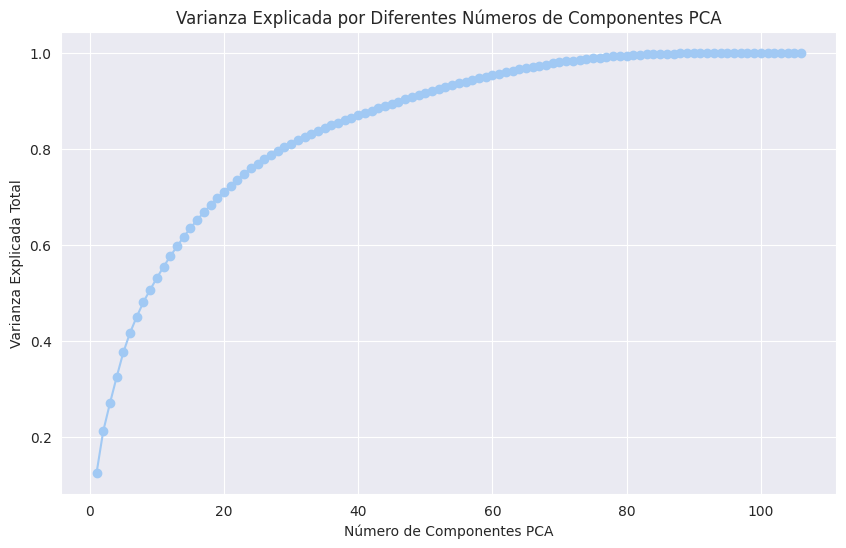

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def apply_pca(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    return X_pca, explained_variance

# Asumiendo que X_train_processed es tu conjunto de datos preprocesado
max_components = min(X_train_processed.shape)  # Máximo número de componentes posible
variance_ratios = []

for components in range(1, max_components + 1):
    _, explained_variance = apply_pca(X_train_processed, components)
    variance_ratios.append(explained_variance)

# Graficar la varianza explicada en función del número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), variance_ratios, marker='o')
plt.xlabel('Número de Componentes PCA')
plt.ylabel('Varianza Explicada Total')
plt.title('Varianza Explicada por Diferentes Números de Componentes PCA')
plt.grid(True)
plt.show()

In [ ]:
threshold = 0.95  # 95% de varianza explicada
components_for_threshold = next(x[0] for x in enumerate(variance_ratios) if x[1] >= threshold)

print(f"Se requieren {components_for_threshold + 1} componentes para explicar al menos el {threshold*100}% de la varianza.")

Se requieren 59 componentes para explicar al menos el 95.0% de la varianza.


In [ ]:
# Definir el objeto PCA con 60 componentes
pca = PCA(n_components=60)

# Ajustar el PCA al conjunto de datos preprocesado y transformar los datos
X_train_pca = pca.fit_transform(X_train_processed)

In [ ]:
import pandas as pd

# Convertir X_train_pca a un DataFrame de pandas
pca_columns = [f'PCA_{i}' for i in range(1, 61)]  # Nombres de columnas como PCA_Component_1, PCA_Component_2, etc.
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)

# Mostrar las primeras filas del dataframe para verificación
display(X_train_pca_df)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_51,PCA_52,PCA_53,PCA_54,PCA_55,PCA_56,PCA_57,PCA_58,PCA_59,PCA_60
0,-0.683022,0.284147,0.042021,-0.839044,-0.423001,0.697173,-0.211535,-0.337596,-0.867328,-0.099004,...,0.448258,0.517971,-0.314135,-0.169248,0.164311,0.105758,-0.067744,-0.025936,0.090753,0.006610
1,-0.215911,0.356842,-0.017275,-0.767375,-0.595758,0.450360,-0.404020,-0.595676,-0.083511,-0.729705,...,-0.018670,-0.003375,-0.033094,0.034278,0.031683,-0.202199,0.058239,-0.010767,0.017584,-0.002266
2,-0.070725,1.465194,0.436145,-0.047199,1.080694,0.399211,-0.550655,0.346583,-0.099067,0.001703,...,0.135316,-0.240019,0.352348,0.382485,0.022161,0.669890,0.016096,-0.059121,0.066439,-0.027072
3,1.164386,1.309108,-0.841632,-0.102366,0.061725,0.946984,0.714594,0.058872,0.537149,-0.440100,...,-0.133419,-0.093836,-0.014846,-0.087125,-0.456902,-0.055195,-0.014352,0.032708,0.581998,-0.232346
4,-0.229488,-0.698843,0.463771,-1.237590,0.458899,0.787957,0.345448,0.307642,1.417090,0.241306,...,-0.037511,-0.030836,-0.028606,-0.010711,0.021339,-0.037597,-0.007316,-0.006209,-0.016629,-0.020618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-0.632226,0.411568,-0.326994,-0.779481,-0.658185,0.616190,-0.417508,0.179736,-0.639443,-0.546955,...,-0.034373,-0.064868,-0.033002,0.010187,0.034722,0.033673,0.000980,0.044060,0.073812,0.120517
31643,-0.445716,0.576375,-0.916785,0.139448,0.679761,-0.458265,-0.267440,-0.041206,-0.130405,0.819955,...,-0.044613,-0.030721,-0.014103,0.114055,-0.087675,-0.023911,-0.002760,0.111053,0.196490,0.663066
31644,-0.056211,-0.037330,1.532551,0.799569,0.030293,-0.006394,-0.061378,-0.009294,-0.077929,-0.123639,...,0.063420,0.038662,-0.032811,0.024166,0.042210,-0.003211,0.004411,-0.008430,0.065781,-0.004319
31645,-0.659820,0.098063,-0.034792,-0.038455,-0.748131,0.761648,-0.463706,0.588231,-0.899401,-0.183150,...,0.452408,0.423169,-0.285708,-0.131375,0.153267,0.132460,0.006409,0.740311,0.108441,-0.061059


In [ ]:
y_train

,y
13382,no
32641,no
3991,no
8068,no
27484,no
...,...
16952,no
6317,no
34781,no
13679,no


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


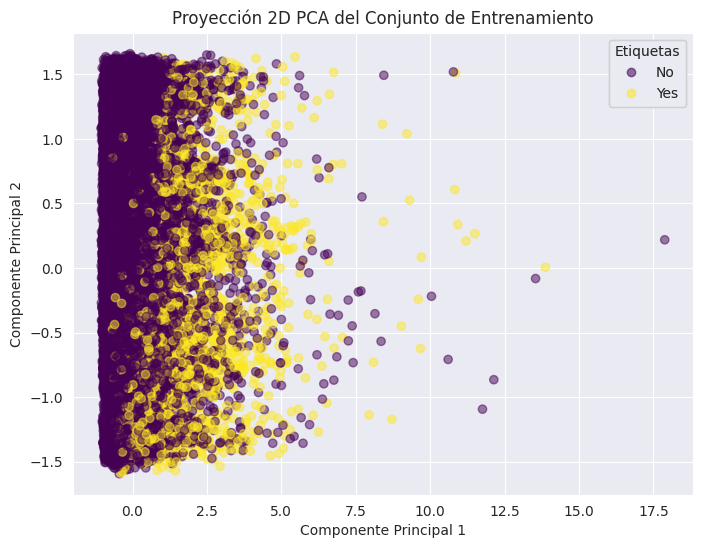

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # This will encode 'no' as 0 and 'yes' as 1
X_train_pca_2d_df['label'] = y_train_encoded
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca_2d_df['PCA1'], X_train_pca_2d_df['PCA2'], c=X_train_pca_2d_df['label'], cmap='viridis', alpha=0.5)
plt.title('Proyección 2D PCA del Conjunto de Entrenamiento')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Crear y añadir la leyenda
legend1 = plt.legend(*scatter.legend_elements(), title="Etiquetas")
legend1.get_texts()[0].set_text('No')
legend1.get_texts()[1].set_text('Yes')
plt.gca().add_artist(legend1)  # Utilizar plt.gca() para obtener los ejes actuales y añadir la leyenda

plt.show()

Podemos observar una proyección básica del comportamiento de los datos y sus clases.

### Red Neuronal: Modelo 1

En esta arquitectura básica se usarán dos capas ocultas con 128 y 64 neuronas (ambas con función de activacion ReLU($x$).

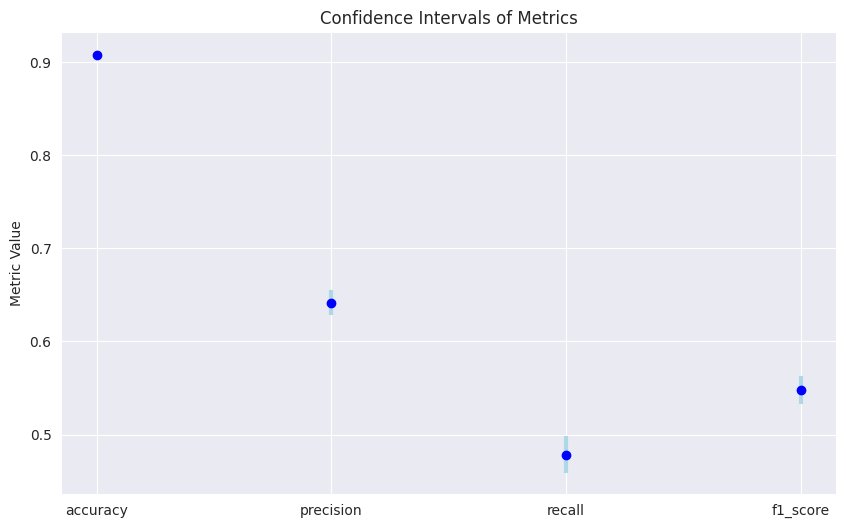

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork(nn.Module):
    def __init__(self, input_shape, hidden_layers, activation=nn.ReLU(), final_activation=nn.Sigmoid(), dropout_rate=0.0):
        super(NeuralNetwork, self).__init__()
        layers = [nn.Linear(input_shape, hidden_layers[0]), activation, nn.Dropout(dropout_rate)]

        for i in range(len(hidden_layers) - 1):
            layers += [nn.Linear(hidden_layers[i], hidden_layers[i + 1]), activation, nn.Dropout(dropout_rate)]

        layers += [nn.Linear(hidden_layers[-1], 1), final_activation]
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

def cross_validate_and_metrics(X, y, hidden_layers, epochs, dropout_rate, n_splits=10, batch_size=32):
    kfold = KFold(n_splits=n_splits, shuffle=True)
    accuracies, precisions, recalls, f1s, conf_matrices = [], [], [], [], []

    for train_idx, test_idx in kfold.split(X):
        nn_model = NeuralNetwork(input_shape=X.shape[1], hidden_layers=hidden_layers, dropout_rate=dropout_rate)
        optimizer = optim.Adam(nn_model.parameters())
        criterion = nn.BCELoss()

        train_dataset = TensorDataset(torch.Tensor(X[train_idx]), torch.Tensor(y[train_idx]))
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        nn_model.train()
        for epoch in range(epochs):
            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = nn_model(batch_X)
                loss = criterion(outputs.squeeze(), batch_y)
                loss.backward()
                optimizer.step()

        nn_model.eval()
        test_preds = nn_model(torch.Tensor(X[test_idx])).detach().numpy()
        test_preds = (test_preds > 0.5).astype(int)
        test_y = y[test_idx]

        accuracies.append(accuracy_score(test_y, test_preds))
        precisions.append(precision_score(test_y, test_preds))
        recalls.append(recall_score(test_y, test_preds))
        f1s.append(f1_score(test_y, test_preds))
        conf_matrices.append(confusion_matrix(test_y, test_preds))

    results = {
        'accuracy': {'mean': np.mean(accuracies), 'std': np.std(accuracies), 'all_values': accuracies},
        'precision': {'mean': np.mean(precisions), 'std': np.std(precisions), 'all_values': precisions},
        'recall': {'mean': np.mean(recalls), 'std': np.std(recalls), 'all_values': recalls},
        'f1_score': {'mean': np.mean(f1s), 'std': np.std(f1s), 'all_values': f1s},
        'confusion_matrices': conf_matrices
    }
    return results


# Función para calcular los intervalos de confianza con bootstrapping
def bootstrap_interval(metric_values, n_bootstrap=500, ci=95):
    bootstrap_samples = np.random.choice(metric_values, (n_bootstrap, len(metric_values)))
    bootstrap_means = np.mean(bootstrap_samples, axis=1)
    lower_bound = np.percentile(bootstrap_means, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_means, 100 - (100 - ci) / 2)
    return np.mean(metric_values), lower_bound, upper_bound

# Función para visualizar los intervalos de confianza
def plot_confidence_interval(means, lower_bounds, upper_bounds, metric_names):
    plt.figure(figsize=(10, 6))
    x_vals = np.arange(len(means))
    error = [(np.array(means) - np.array(lower_bounds)), (np.array(upper_bounds) - np.array(means))]
    plt.errorbar(x_vals, means, yerr=error, fmt='o', color='b', ecolor='lightblue', elinewidth=3, capsize=0)
    plt.xticks(x_vals, metric_names)
    plt.title('Confidence Intervals of Metrics (Bootstrapping)')
    plt.ylabel('Metric Value')
    plt.show()

# Parámetros para el modelo
hidden_layers = [128, 64]
epochs = 10
dropout_rate = 0.5

# Asegurándose de que los datos sean de un tipo soportado
X_np = X_train_pca_df.astype(np.float32).values
y_np = y_train.replace({'yes': 1, 'no': 0}).astype(np.float32).values

# Asegúrate de que tus datos X_np y y_np estén correctamente formateados como NumPy arrays
results = cross_validate_and_metrics(X_np, y_np, hidden_layers=hidden_layers, epochs=epochs, dropout_rate=dropout_rate)

# Calcula los intervalos de confianza con bootstrapping
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
means, lower_bounds, upper_bounds = [], [], []

for metric in metrics:
    mean, lower, upper = bootstrap_interval(results[metric]['all_values'])
    means.append(mean)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Visualiza los intervalos de confianza
plot_confidence_interval(means, lower_bounds, upper_bounds, metrics)

In [ ]:
print("Resultados de la validación cruzada:")
print("Exactitud: Media =", results['accuracy']['mean'], ", Desviación Estándar =", results['accuracy']['std'])
print("Precisión: Media =", results['precision']['mean'], ", Desviación Estándar =", results['precision']['std'])
print("Recall: Media =", results['recall']['mean'], ", Desviación Estándar =", results['recall']['std'])
print("Puntuación F1: Media =", results['f1_score']['mean'], ", Desviación Estándar =", results['f1_score']['std'])

Resultados de la validación cruzada:
Exactitud: Media = 0.90776370423185 , Desviación Estándar = 0.0024067256076167826
Precisión: Media = 0.641660311895887 , Desviación Estándar = 0.020460407326210458
Recall: Media = 0.47846928489798 , Desviación Estándar = 0.03235667317483703
Puntuación F1: Media = 0.5475482704468162 , Desviación Estándar = 0.024380583324408643


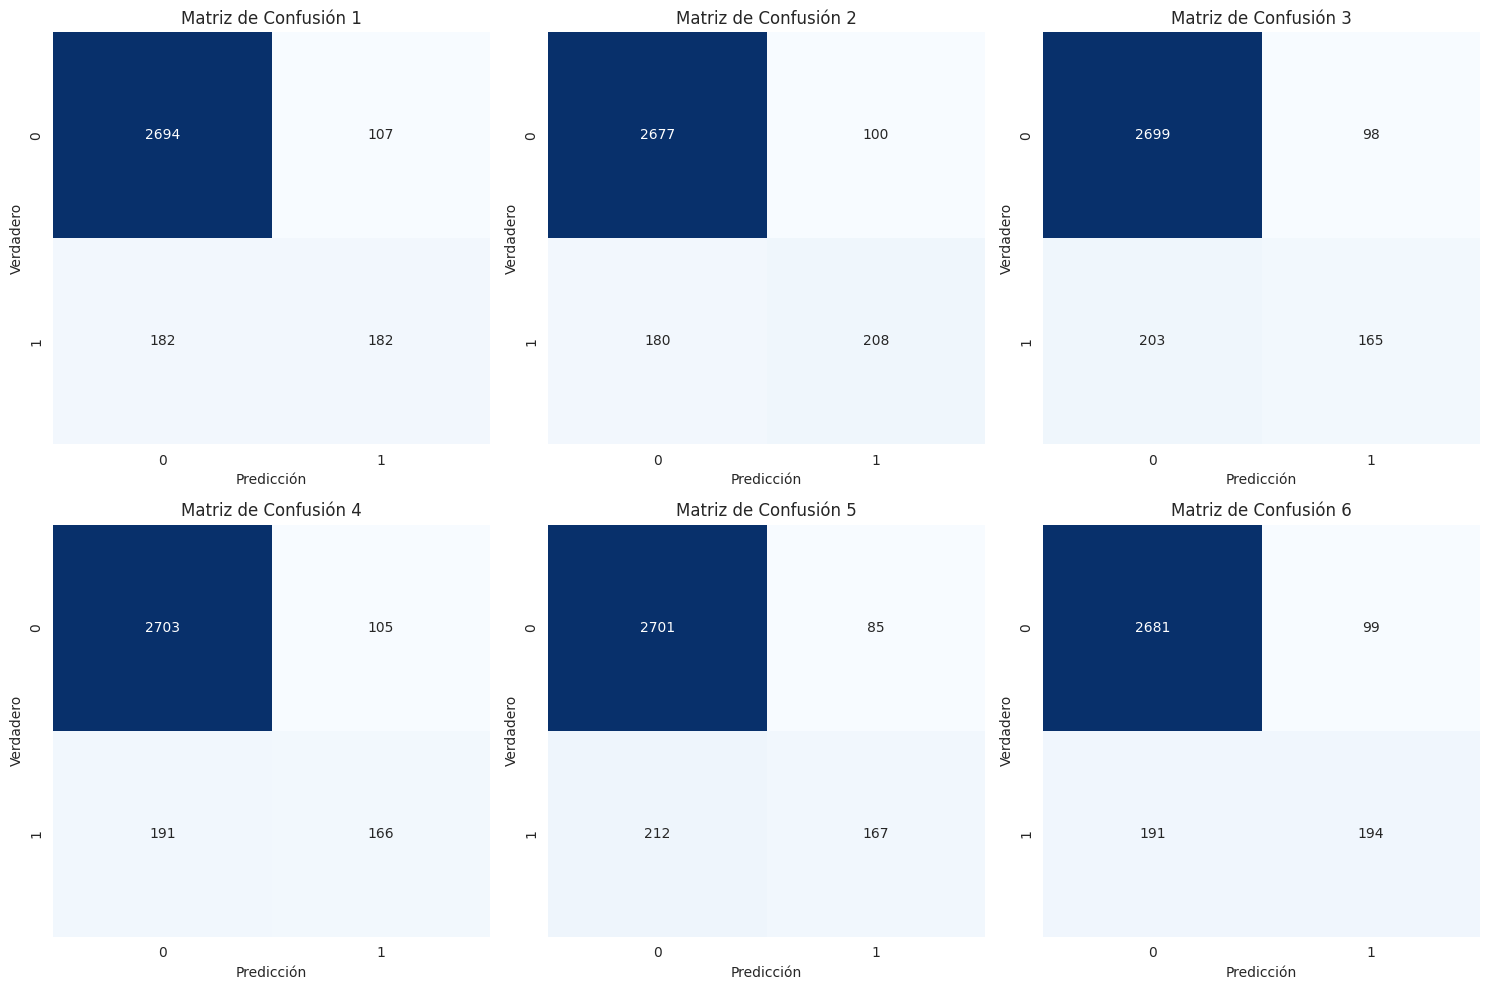

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrices_in_grid(conf_matrices, rows=2, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    axes = axes.flatten() # Asegurarse de que 'axes' sea un array 1D

    for i, matrix in enumerate(conf_matrices):
        if i >= rows * cols:
            break # Evitar índices fuera del rango si hay más matrices que subplots
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
        axes[i].set_title(f'Matriz de Confusión {i+1}')
        axes[i].set_xlabel('Predicción')
        axes[i].set_ylabel('Verdadero')

    # Ocultar los subplots vacíos si los hay
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Llamada a la función para imprimir las matrices de confusión en cuadrícula
plot_confusion_matrices_in_grid(results['confusion_matrices'], rows=2, cols=3)

Podemos observar que es más difícil predecir las clases 1 (sí) debido al imbalance de datos, sin embargo, aproximadamente la mitad de los datos predichos como positivos efectivamente lo son.

### Red Neuronal: Modelo 2

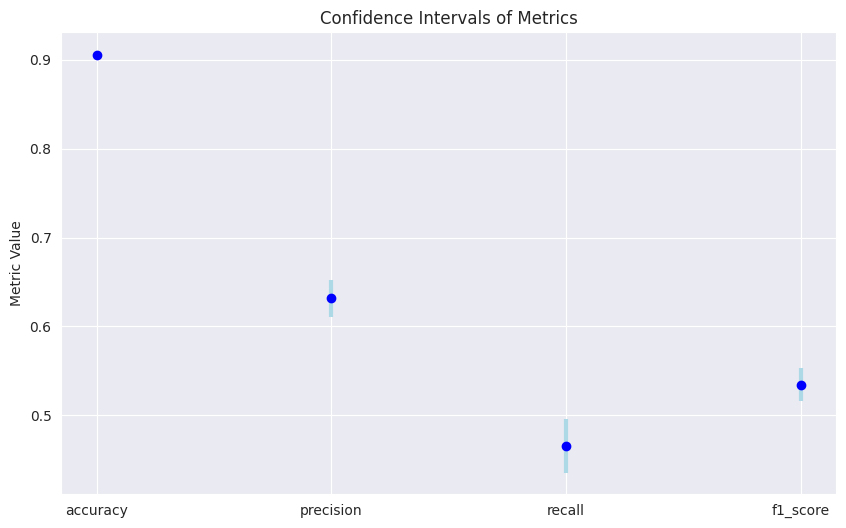

In [ ]:
# Parámetros para el modelo
hidden_layers = [64, 32]
epochs = 10
dropout_rate = 0.5

# Asegurándose de que los datos sean de un tipo soportado
X_np = X_train_pca_df.astype(np.float32).values
y_np = y_train.replace({'yes': 1, 'no': 0}).astype(np.float32).values

results = cross_validate_and_metrics(X_np, y_np, hidden_layers=hidden_layers, epochs=epochs, dropout_rate=dropout_rate)

# Calcula los intervalos de confianza con bootstrapping
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
means, lower_bounds, upper_bounds = [], [], []

for metric in metrics:
    mean, lower, upper = bootstrap_interval(results[metric]['all_values'])
    means.append(mean)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Visualiza los intervalos de confianza
plot_confidence_interval(means, lower_bounds, upper_bounds, metrics)

In [ ]:
print("Resultados de la validación cruzada:")
print("Exactitud: Media =", results['accuracy']['mean'], ", Desviación Estándar =", results['accuracy']['std'])
print("Precisión: Media =", results['precision']['mean'], ", Desviación Estándar =", results['precision']['std'])
print("Recall: Media =", results['recall']['mean'], ", Desviación Estándar =", results['recall']['std'])
print("Puntuación F1: Media =", results['f1_score']['mean'], ", Desviación Estándar =", results['f1_score']['std'])

Resultados de la validación cruzada:
Exactitud: Media = 0.9054252820534329 , Desviación Estándar = 0.0032619619592396754
Precisión: Media = 0.6319310745428999 , Desviación Estándar = 0.03573047547073161
Recall: Media = 0.46553381374163016 , Desviación Estándar = 0.04893842743331772
Puntuación F1: Media = 0.5337221234369159 , Desviación Estándar = 0.02993884882602441


Podemos observar que este modelo bajó un poco en su rendimiento, probablemente porque al incrementar la complejidad se produce un poco de sobreajuste y no se generaliza bien.

### Red Neuronal: Modelo 3

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


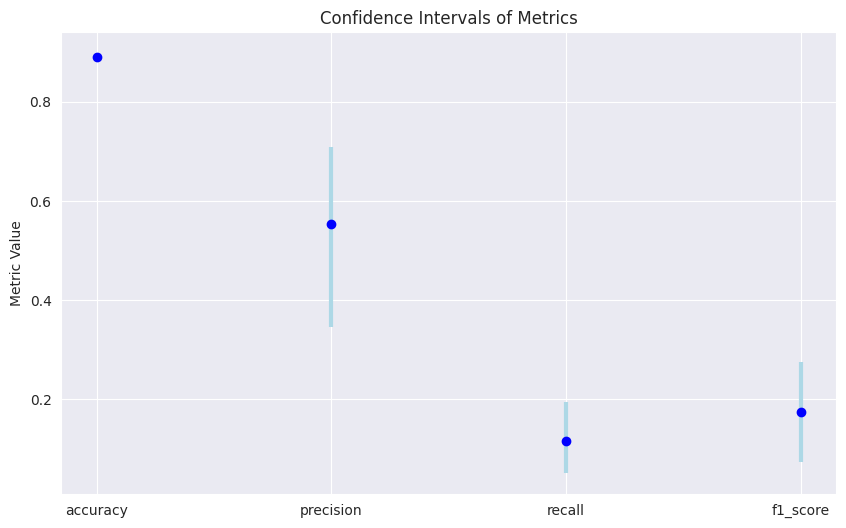

In [ ]:
# Parámetros para el modelo
hidden_layers = [1024, 512, 256, 128, 64, 32, 6]
epochs = 10
dropout_rate = 0.5

results = cross_validate_and_metrics(X_np, y_np, hidden_layers=hidden_layers, epochs=epochs, dropout_rate=dropout_rate)

# Calcula los intervalos de confianza con bootstrapping
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
means, lower_bounds, upper_bounds = [], [], []

for metric in metrics:
    mean, lower, upper = bootstrap_interval(results[metric]['all_values'])
    means.append(mean)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Visualiza los intervalos de confianza
plot_confidence_interval(means, lower_bounds, upper_bounds, metrics)

In [ ]:
print("Resultados de la validación cruzada:")
print("Exactitud: Media =", results['accuracy']['mean'], ", Desviación Estándar =", results['accuracy']['std'])
print("Precisión: Media =", results['precision']['mean'], ", Desviación Estándar =", results['precision']['std'])
print("Recall: Media =", results['recall']['mean'], ", Desviación Estándar =", results['recall']['std'])
print("Puntuación F1: Media =", results['f1_score']['mean'], ", Desviación Estándar =", results['f1_score']['std'])

Resultados de la validación cruzada:
Exactitud: Media = 0.8905734936679028 , Desviación Estándar = 0.011133096332053262
Precisión: Media = 0.5536050127121556 , Desviación Estándar = 0.2817160833544123
Recall: Media = 0.11562527080004315 , Desviación Estándar = 0.12150825776186194
Puntuación F1: Media = 0.17342403312420188 , Desviación Estándar = 0.1666009556394725


Este es el modelo que más variabilidad y peor confianza tiene, y el que mayor complejidad también. Podemos ver que bajó mucho su rendimiento al añadir muchas más capas.

### Redes Neuronales: Modelo 4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

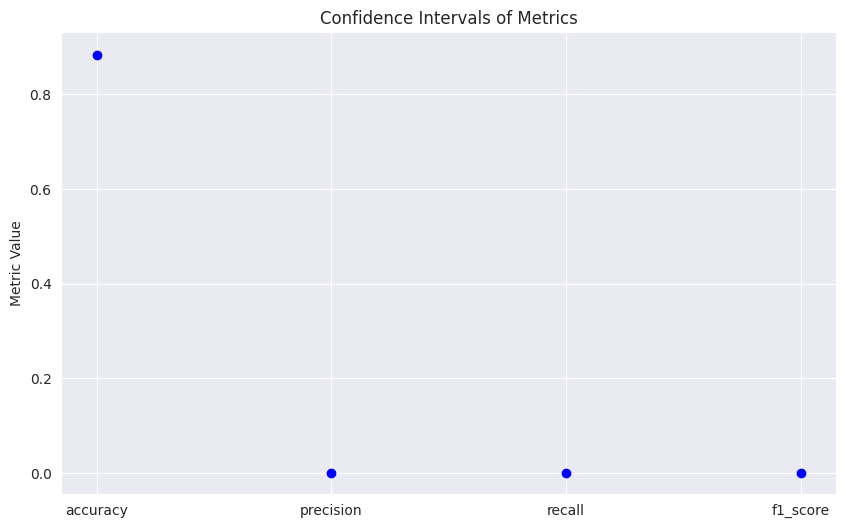

In [356]:
# Parámetros para el modelo
hidden_layers = [1, 1, 1]
epochs = 10
dropout_rate = 0.5

results = cross_validate_and_metrics(X_np, y_np, hidden_layers=hidden_layers, epochs=epochs, dropout_rate=dropout_rate)

# Calcula los intervalos de confianza con bootstrapping
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
means, lower_bounds, upper_bounds = [], [], []

for metric in metrics:
    mean, lower, upper = bootstrap_interval(results[metric]['all_values'])
    means.append(mean)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Visualiza los intervalos de confianza
plot_confidence_interval(means, lower_bounds, upper_bounds, metrics)

El otro extremo, una red demasiado sencilla no produce ningún resultado de valor. (Las advertencias son las divisiones entre cero que indica que hubo una clase que nunca fue predicha).

### Redes Neuronales: Modelo 5

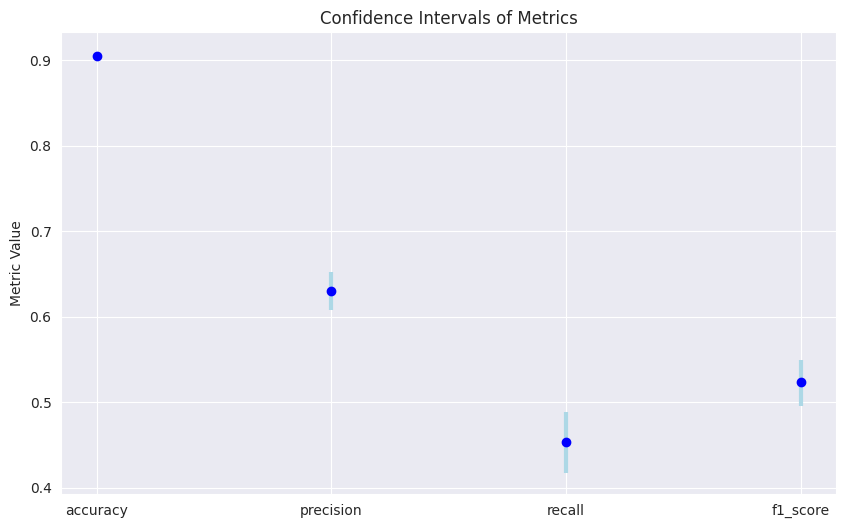

In [357]:
# Parámetros para el modelo
hidden_layers = [32, 64, 16]
epochs = 10
dropout_rate = 0.5

results = cross_validate_and_metrics(X_np, y_np, hidden_layers=hidden_layers, epochs=epochs, dropout_rate=dropout_rate)

# Calcula los intervalos de confianza con bootstrapping
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
means, lower_bounds, upper_bounds = [], [], []

for metric in metrics:
    mean, lower, upper = bootstrap_interval(results[metric]['all_values'])
    means.append(mean)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Visualiza los intervalos de confianza
plot_confidence_interval(means, lower_bounds, upper_bounds, metrics)

Esta es una red moderada en comparación a las demás, pero varía mucho y baja un poco de rendimiento generalmente hablando.

### Redes Neuronales: Modelo 6

Este modelo se simplifica un poco, teniendo solo dos capas con una mayor cantidad de neuronas (512) cada una.

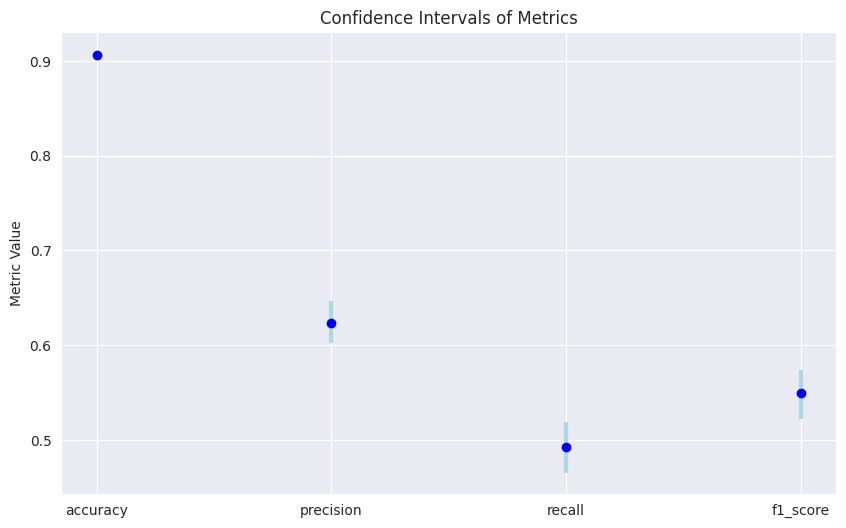

In [358]:
# Parámetros para el modelo
hidden_layers = [512, 512]
epochs = 10
dropout_rate = 0.5

results = cross_validate_and_metrics(X_np, y_np, hidden_layers=hidden_layers, epochs=epochs, dropout_rate=dropout_rate)

# Calcula los intervalos de confianza con bootstrapping
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
means, lower_bounds, upper_bounds = [], [], []

for metric in metrics:
    mean, lower, upper = bootstrap_interval(results[metric]['all_values'])
    means.append(mean)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Visualiza los intervalos de confianza
plot_confidence_interval(means, lower_bounds, upper_bounds, metrics)

Sin embargo, podemos notar que su Recall es mucho mejor que las otras y en general puede llegar a tener intervalos de confidencia mayores que 0.5 an todas sus métricas.

### Redes Neuronales: Modelo 7

En esta red, se prueban 128, 64 y 32 neuronas, con una función de activación distinta cada capa: La ReLU(x), tangente hiperbólica, y LeakyReLU(x).

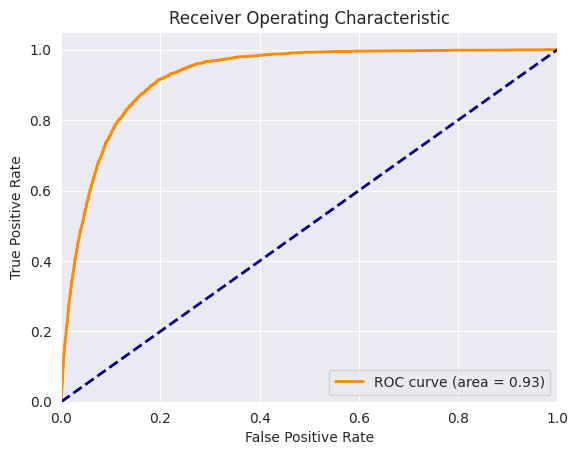

In [359]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

class NeuralNetwork(nn.Module):
    def __init__(self, input_shape, hidden_layers, activations, final_activation=nn.Sigmoid(), dropout_rate=0.0):
        super(NeuralNetwork, self).__init__()
        assert len(hidden_layers) == len(activations), "La longitud de hidden_layers y activations debe ser la misma."

        layers = [nn.Linear(input_shape, hidden_layers[0])]
        layers.append(activations[0])
        layers.append(nn.Dropout(dropout_rate))

        for i in range(1, len(hidden_layers)):
            layers.append(nn.Linear(hidden_layers[i-1], hidden_layers[i]))
            layers.append(activations[i])
            layers.append(nn.Dropout(dropout_rate))

        layers.append(nn.Linear(hidden_layers[-1], 1))
        layers.append(final_activation)
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

def cross_validate_and_metrics(X, y, hidden_layers, activations, epochs, dropout_rate, n_splits=10, batch_size=32):
    kfold = KFold(n_splits=n_splits, shuffle=True)
    accuracies, precisions, recalls, f1s, conf_matrices, all_probs, all_tests = [], [], [], [], [], [], []

    for train_idx, test_idx in kfold.split(X):
        nn_model = NeuralNetwork(input_shape=X.shape[1], hidden_layers=hidden_layers, activations=activations, dropout_rate=dropout_rate)
        optimizer = optim.Adam(nn_model.parameters())
        criterion = nn.BCELoss()

        train_dataset = TensorDataset(torch.Tensor(X[train_idx]), torch.Tensor(y[train_idx]))
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

        nn_model.train()
        for epoch in range(epochs):
            for batch_X, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = nn_model(batch_X)
                loss = criterion(outputs.squeeze(), batch_y)
                loss.backward()
                optimizer.step()

        nn_model.eval()
        test_probs = nn_model(torch.Tensor(X[test_idx])).detach().numpy().squeeze()
        test_preds = (test_probs > 0.5).astype(int)
        test_y = y[test_idx]

        accuracies.append(accuracy_score(test_y, test_preds))
        precisions.append(precision_score(test_y, test_preds))
        recalls.append(recall_score(test_y, test_preds))
        f1s.append(f1_score(test_y, test_preds))
        conf_matrices.append(confusion_matrix(test_y, test_preds))
        all_probs.extend(test_probs)
        all_tests.extend(test_y)

    results = {
        'accuracy': {'mean': np.mean(accuracies), 'std': np.std(accuracies)},
        'precision': {'mean': np.mean(precisions), 'std': np.std(precisions)},
        'recall': {'mean': np.mean(recalls), 'std': np.std(recalls)},
        'f1_score': {'mean': np.mean(f1s), 'std': np.std(f1s)},
        'confusion_matrices': conf_matrices,
        'all_probs': all_probs,
        'all_tests': all_tests
    }
    return results

# Parámetros para el modelo
hidden_layers = [128, 64, 32]
activations = [nn.ReLU(), nn.Tanh(), nn.LeakyReLU()]
epochs = 10
dropout_rate = 0.5

# Preparar los datos
X_np = X_train_pca_df.astype(np.float32).values
y_np = y_train.replace({'yes': 1, 'no': 0}).astype(np.float32).values

# Ejecutar la validación cruzada y obtener resultados
results = cross_validate_and_metrics(X_np, y_np,
                                     hidden_layers=hidden_layers,
                                     activations=activations,
                                     epochs=epochs,
                                     dropout_rate=dropout_rate)

# Calcular y visualizar la curva ROC
fpr, tpr, thresholds = roc_curve(results['all_tests'], results['all_probs'])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [360]:
# Print the statistics
print("Accuracy: Mean =", results['accuracy']['mean'], "Std =", results['accuracy']['std'])
print("Precision: Mean =", results['precision']['mean'], "Std =", results['precision']['std'])
print("Recall: Mean =", results['recall']['mean'], "Std =", results['recall']['std'])
print("F1 Score: Mean =", results['f1_score']['mean'], "Std =", results['f1_score']['std'])

Accuracy: Mean = 0.9059623169823228 Std = 0.003906751052612441
Precision: Mean = 0.6376770562033445 Std = 0.01598864499696409
Recall: Mean = 0.45681666417893113 Std = 0.06317985234698813
F1 Score: Mean = 0.529323317604246 Std = 0.042606957259460856


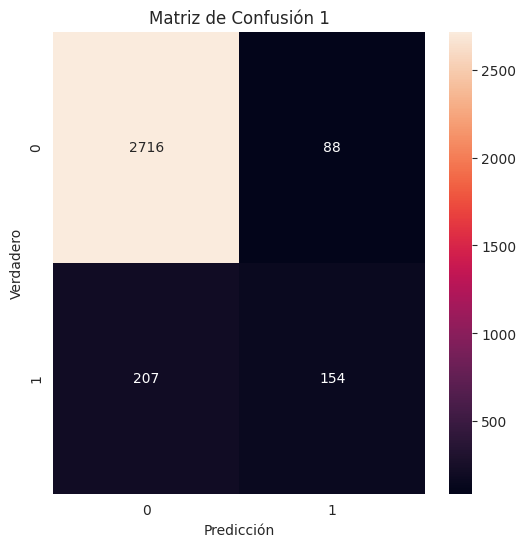

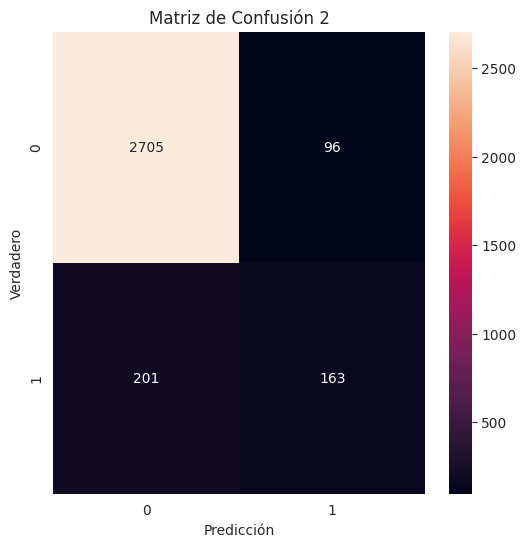

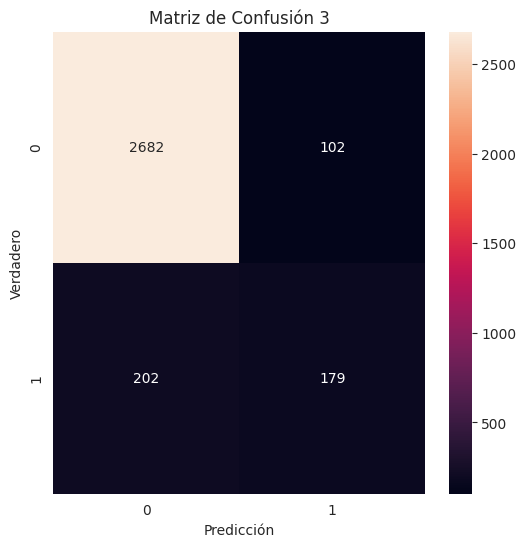

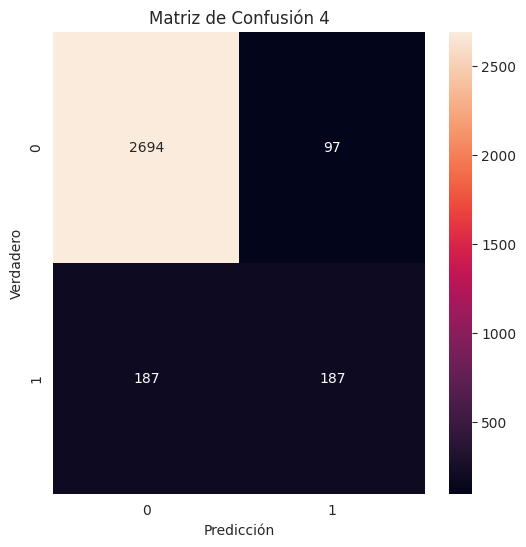

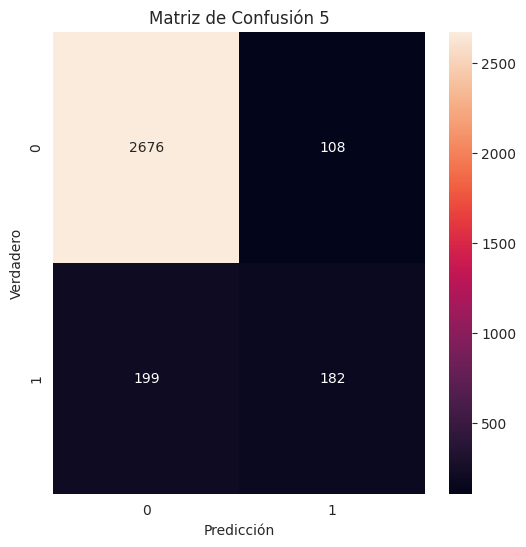

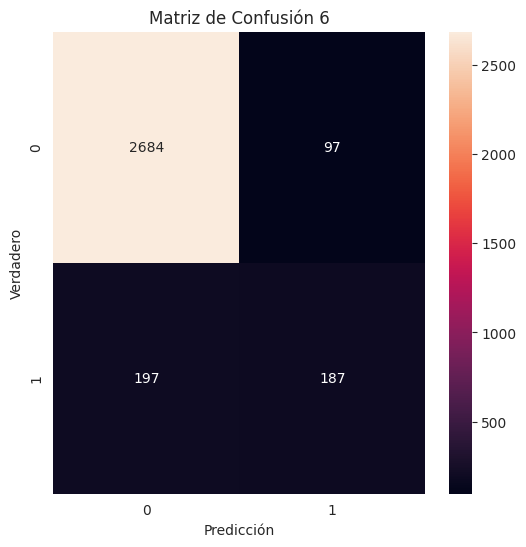

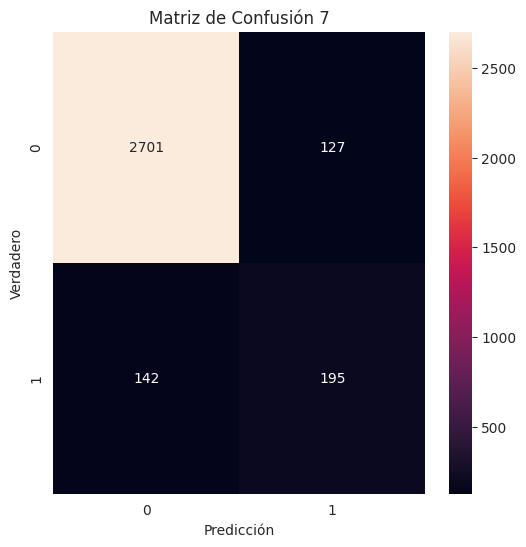

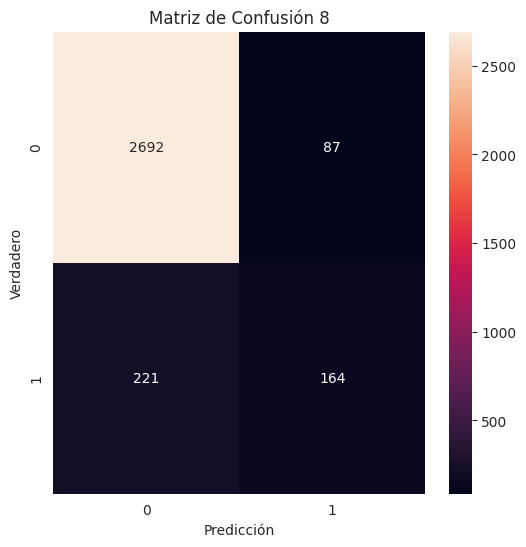

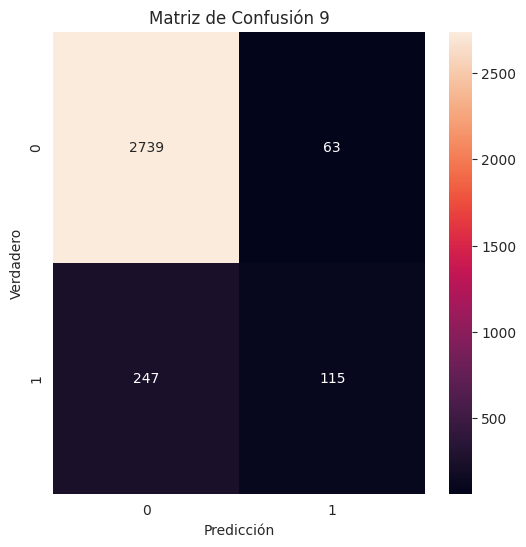

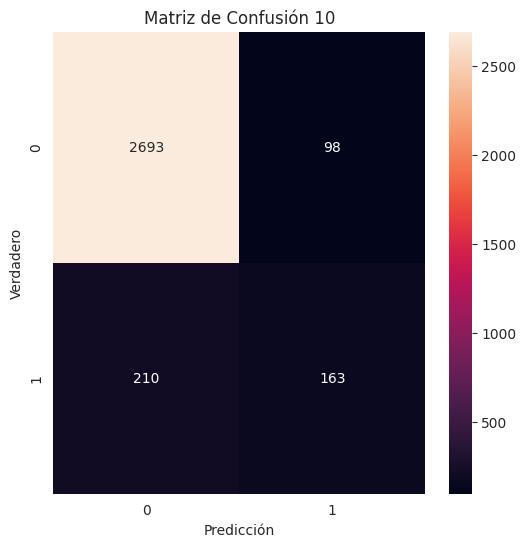

In [361]:
plot_confusion_matrices(results['confusion_matrices'])

¿Cuál fue el mejor modelo?

El segundo conjunto de resultados es el mejor en general (Modelo 2), ya que tiene los valores más altos en términos de media para todas las métricas (Exactitud, Precisión, Recall, Puntuación F1) y mantiene desviaciones estándar razonablemente bajas. Esto indica que el modelo correspondiente a este conjunto es más preciso y consistente en sus predicciones en comparación con los otros dos modelos. Esto es sorprendente, ya que es una red relativamente sencilla e indica que podríamos experimentar con parámetros similares para poder optimizar todas las métricas.

### Modelos Propuestos:

- Máquinas de Soport Vectorial con distintos Kernels:

La función `cross_validate_and_metrics_svm` está diseñada para realizar una validación cruzada con una Máquina de Soporte Vectorial (SVM). Esta función permite especificar diferentes tipos de kernel, lo que la hace adaptable a una variedad de conjuntos de datos y problemas de clasificación.

Parámetris y Kernels:

- **Kernel RBF (Radial Basis Function):** Es el kernel por defecto (`kernel='rbf'`). Es ideal para espacios de alta dimensión y es útil cuando el número de dimensiones supera el número de muestras.
- **Kernel Lineal:** Utilizado con `kernel='linear'`. Es efectivo para espacios de alta dimensión y para problemas de clasificación lineal.
- **Kernel Polinómico:** Especificado con `kernel='poly'`. Permite fronteras de decisión no lineales y es beneficioso en casos donde las relaciones entre características son no lineales.
- **Kernel Sigmoide:** Seleccionado con `kernel='sigmoid'`. Transforma los datos a un espacio sigmoide, similar a una red neuronal con activación sigmoide.

**Parámetros Adicionales:**

- **C:** Parámetro de regularización que equilibra la clasificación correcta de los puntos de entrenamiento con la maximización del margen de decisión. Valores altos de C buscan clasificar todos los puntos de entrenamiento correctamente.
- **Gamma:** Aplica solo para kernels no lineales. Controla la distancia de influencia de un solo punto de entrenamiento, con valores altos indicando un alcance más corto.

## Proceso de Validación Cruzada y Visualización

La función ejecuta una validación cruzada estratificada, entrenando un modelo SVM en cada partición del conjunto de datos y evaluando su rendimiento en una parte no vista del conjunto de datos.

### Visualización de Resultados

- **Curva ROC:** Muestra la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos. Es útil para evaluar la capacidad del modelo de distinguir entre clases.
- **Matrices de Confusión:** Proporcionan una visualización detallada de la clasificación correcta e incorrecta por el modelo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import seaborn as sns

def cross_validate_and_metrics_svm(X, y, kernel='rbf', C=1.0, gamma='scale', n_splits=5):
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True)
    accuracies, precisions, recalls, f1s, conf_matrices, all_probs, all_tests = [], [], [], [], [], [], []

    for train_idx, test_idx in kfold.split(X, y):
        model = svm.SVC(kernel=kernel, C=C, gamma=gamma, probability=True)
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        test_probs = model.predict_proba(X_test)[:, 1]
        test_preds = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, test_preds))
        precisions.append(precision_score(y_test, test_preds))
        recalls.append(recall_score(y_test, test_preds))
        f1s.append(f1_score(y_test, test_preds))
        conf_matrices.append(confusion_matrix(y_test, test_preds))
        all_probs.extend(test_probs)
        all_tests.extend(y_test)

    results = {
        'accuracy': {'mean': np.mean(accuracies), 'std': np.std(accuracies)},
        'precision': {'mean': np.mean(precisions), 'std': np.std(precisions)},
        'recall': {'mean': np.mean(recalls), 'std': np.std(recalls)},
        'f1_score': {'mean': np.mean(f1s), 'std': np.std(f1s)},
        'confusion_matrices': conf_matrices,
        'all_probs': all_probs,
        'all_tests': all_tests
    }
    return results

def plot_roc_curve(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrices(conf_matrices):
    for i, matrix in enumerate(conf_matrices):
        plt.figure(figsize=(5, 4))
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix {i + 1}')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

# Parámetris
kernel = 'rbf'  # Kernel type: 'linear', 'poly', 'rbf', 'sigmoid'
C = 1.0        # Parámetri de Regularización
gamma = 'scale' # Coeficiente del Kernel

results = cross_validate_and_metrics_svm(X_np, y_np, kernel=kernel, C=C, gamma=gamma)

# Estadísticas
print("Accuracy: Mean =", results['accuracy']['mean'], "Std =", results['accuracy']['std'])
print("Precision: Mean =", results['precision']['mean'], "Std =", results['precision']['std'])
print("Recall: Mean =", results['recall']['mean'], "Std =", results['recall']['std'])
print("F1 Score: Mean =", results['f1_score']['mean'], "Std =", results['f1_score']['std'])

# Curva ROC
plot_roc_curve(np.array(results['all_tests']), np.array(results['all_probs']))

# Matrices
plot_confusion_matrices(results['confusion_matrices'])

# Discusión y Conslusiones

## Discusión en Profundidad del Comportamiento de Modelos de Aprendizaje Automático

El comportamiento de los modelos de aprendizaje automático, especialmente en las redes neuronales profundas, es multifacético y complejo. Durante este proyecto comprendimos que es un proceso que requiere de mucha experiencia, conocimiento en el campo, conocimiento profundo de las librerías, etc. A continuación, se presenta una discusión detallada sobre varios aspectos clave:

### Comportamiento de Clasificadores

**Desempeño Diferencial entre Clases:**

- En un clasificador, es común que el modelo no se desempeñe de manera uniforme en todas las clases. Esto puede deberse a varios factores:
  - **Desequilibrio de Clases:** Si algunas clases tienen significativamente más muestras que otras, el modelo puede sesgarse hacia las clases más representadas.

  - **Complejidad de las Características:** Algunas clases pueden ser intrínsecamente más difíciles de diferenciar debido a la similitud de sus características con otras clases.

  En nuestro caso, las clases son muy desbalanceadas y podemos aplicar algunas otras técnicas de submuestreo o manejo de pesos. También se podría usar un enfoque similar al que se puede tomar al hacer un clasificador de Bayes, y utilizar un umbral en vez de tomar simplemente la mayor probabilidad. En estos casos, nos interesa reconocer los potenciales subscriptores del servicio, que en casos erróneos puede llegar a pérdida de tiempo y recursos.


**Soluciones:**

- **Rebalanceo de Datos:** Utilizar técnicas como sobremuestreo de clases minoritarias o submuestreo de clases mayoritarias.

- **Redimensionar Datos:** Dependiendo de la codificación que usemos, los datos pueden llegar a producir sobreajuste. En nuestro caso, al inicio teníamos aproximadamente 120 columnas, o cual producía exactitudes de poco menos del 3%. Parece que el modelo  se memorizaba los datos y no generalizaba, por lo que la solución fue reducir la dimensionalidad a 60 características con PCA.

### Extracción de Información de los Resultados del Modelo

**Importancia de Variables:**

- **Análisis de Características:** Técnicas como la importancia del atributo pueden identificar qué variables contribuyen más a las predicciones del modelo. Pudimos observar que el modelo funcionar mejor al aplicar PCA y reducir su dimensionalidad (de 3% de accuracy a casi 90 %). Hay variables que tienen muy poca correlación o asociación debido a que no tienen una relación perfectamente lineal con la salida, sin embargo al observar los graficos podemos ver que si hay ciertas tendencias.

- **Identificación de Patrones:** Dependiendo del tipo de modelo, se pueden identificar patrones específicos o combinaciones de características que son particularmente influyentes. Parte de las mejoras propuestas a este proyecto sería investigar las combinaciones de patrones que más influyen para maximizar las medias de las métricas y minimizar las varianzas, proceso el cual es extremadamente costo en tiepo y recursos.

**Funcionamiento Óptimo del Modelo:**

- **Condiciones Ideales:** Identificar en qué condiciones (por ejemplo, ciertos rangos de variables) el modelo realiza las mejores predicciones.
- **Limitaciones:** Reconocer dónde y por qué el modelo falla puede ser tan informativo como entender dónde tiene éxito.

### Comportamiento y Mejoras de los Modelos

**Posibles Fallas:**

- **Sobreajuste:** Un modelo demasiado complejo puede memorizar los datos de entrenamiento, fallando en generalizar a nuevos datos.

- **Subajuste:** Un modelo demasiado simple puede no capturar la complejidad subyacente de los datos.

**Mejoras Potenciales:**

- **Regularización:** Técnicas como el dropout y la regularización L1/L2 pueden ayudar a prevenir el sobreajuste.

- **Optimización de Hiperparámetros:** Ajustar hiperparámetros como la tasa de aprendizaje, el número de capas/neuronas puede mejorar significativamente el rendimiento.

- **Mayores Repeticiones/Muestras para Validación:** Hacer varias repeticiones o usar muchos ajustes para las etapas de validación, puede llegra a ser excesivamente costoso (computacional y temporalmente hablando) y hace que algunas configuraciones no sean factibles.

**Consideraciones Finales:**

- **Interpretación de Modelos:** Comprender cómo y por qué el modelo toma decisiones es crucial, especialmente en aplicaciones sensibles.

- **Evaluación Continua:** Los modelos deben evaluarse continuamente con nuevos datos para garantizar que sigan siendo relevantes y precisos.

- **Optimización de Recursos:** Es impresionante la cantidad de tiempo o recursos que el entrenamiento de unos modelos pueden llegar a tener, ahora comprendemos por qué entrenar modelos como GPT es tan costoso y lo poco factible que sería de corregir luego de detectar un error en modelos tan grandes.

### Reflexiones

- Carlos Ávila:

**¿Cubrió sus espectativas?:**

El curso no solo cumplió, sino que superó ampliamente mis expectativas. Al principio, anticipé que nos concentraríamos principalmente en la programación y el uso de funciones predefinidas, pero me sorprendió gratamente la profundidad y el rigor matemático con el que se abordó cada tema. Esto proporcionó una comprensión sólida y detallada de cómo funcionan realmente los algoritmos subyacentes.

**¿Su visión de Inteligencia artificial cambió o se mantuvo igual?:**

Mi percepción de la inteligencia artificial experimentó un cambio radical. Aunque estaba al tanto de la importancia del álgebra lineal en la IA, no había comprendido completamente su alcance y cómo casi todo se puede modelar a través de ella. Ahora tengo una visión más clara sobre lo que implica el desarrollo de algoritmos de Machine Learning, especialmente en términos de descubrir relaciones entre variables de entrada y salida. También he aprendido cómo estas técnicas pueden aplicarse en diversos contextos para proporcionar representaciones más precisas que los métodos tradicionales, como en la agrupación de datos.

**¿Cual fue su tema favorito y menos favorito?**

La clasificación fue mi tema favorito, principalmente por su naturaleza intuitiva y su similitud con los problemas de regresión. Disfruté enormemente implementando algoritmos desde cero, en particular el de detección de dígitos. Por otro lado, el tema que menos me atrajo fue la Factorización de Matrices, no por falta de interés, sino por su naturaleza menos intuitiva. Aunque las aplicaciones que vimos fueron fascinantes, me hubiera gustado abordarlo de una manera más práctica, implementando algoritmos desde cero.

**¿Qué le mejoraria al curso?**

En general el curso me pareció muy completo y perfecto para quienes quieran aprender IA sabiendo Álgebra Lineal. Una área que me hubiera gustado explorar más a fondo es el Procesamiento de Lenguaje Natural. Aunque estoy seguro de que ya tenemos las bases para comprenderlo e implementarlo por nuestra cuenta, una inmersión más profunda en este tema habría sido interesante. En general, este ha sido el curso que más he disfrutado en mi carrera, y estoy convencido de que la inteligencia artificial es el campo en el que quiero especializarme.







- Salvador Mejía:

**¿Cubrió sus espectativas??**

Realmente sí, el curso fue más interesante de lo que imaginé. Pensé que sería solo programación, pero me gustó cómo nos enfocamos también en la teoría detrás de todo.

**¿Su visión de Inteligencia artificial cambió o se mantuvo igual?**

Mi visión de la IA definitivamente cambió. Antes pensaba que era algo muy complejo y distante, pero ahora veo que con las matemáticas y la lógica adecuadas, es algo muy accesible y aplicable a muchos problemas reales.

**¿Cual fue su tema favorito y menos favorito?**

Mis favoritos fueron los temas de clasificación y redes neuronales. Me pareció fascinante cómo podemos enseñar a una computadora a reconocer patrones. El que menos me gustó fue, quizás, la factorización de matrices; me resultó un poco abstracto.

**¿Qué le mejoraria al curso?**

Aunque el curso fue muy completo, me hubiera gustado ver más ejemplos prácticos, especialmente en temas como el Procesamiento de Lenguaje Natural. Siento que eso nos hubiera dado una mejor idea de cómo aplicar lo aprendido en situaciones reales.

**Otros comentarios**

Este curso definitivamente despertó mi interés en la IA. Antes lo veía como algo lejano, pero ahora me siento motivado para seguir aprendiendo y explorando en este campo. Fue una experiencia muy enriquecedora.
